# Análisis exploratorio de datos

EDA es un proceso de examen del conjunto de datos disponible para descubrir patrones, detectar anomalías, probar hipótesis y verificar suposiciones utilizando medidas estadísticas.

El objetivo principal de EDA es examinar qué pueden decirnos los datos antes de pasar por el modelado formal o la formulación de hipótesis.

EDA nos permite **oír a nuestros datos**.

Voy a dividir el análisis en los siguientes apartados:

1.   Comprende el problema antes de enfrentarlo.
2.   Estudio univariable.
3.   Estudio multivariable.
4.   Datos limpios, modelos brillantes.
5.   Comprobando supuestos: Descubre la "verdad".

## Librerías necesarias.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import warnings
from IPython.display import Image
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

## Leemos la data

In [ ]:
house_df = pd.read_csv(" ")
house_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

## 1.Comprende el problema antes de enfrentarlo
Para entender realmente el conjunto de datos, estudiaremos el significado y la relevancia de cada variable con respecto al problema planteado. Intentaremos responder algunas cuestiones como:

- La relevancia de la variable en la compra de una casa.
- Solapamiento con otras variables.

El problema es la **predicción del precio de las viviendas**, por lo que la variable objetivo es el **Precio de la vivienda**.

Puedes obtener una descripción detallada de las variables [aquí](https://github.com/Juniorcandela/datasets/blob/main/House%20Prices/data_description.txt)

La data original contiene 81 columnas, para este taller solo tomaremos 25 columnas.

In [ ]:
variables_eliminar = [
'LandSlope', 'LotFrontage', 'LotShape', 'LandContour', 'Condition1', 'Condition2', 'RoofStyle', 'RoofMatl',
'Exterior2nd', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'GarageType',
'GarageYrBlt', 'GarageFinish', 'PavedDrive', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
'ScreenPorch', 'Fence', 'MiscFeature', 'MiscVal', 'Street', 'Alley', 'LotConfig', 'Exterior1st', 'MasVnrType',
'ExterCond', 'HeatingQC', 'CentralAir', 'FireplaceQu', 'GarageCond', 'HalfBath', 'Fireplaces', 'GarageCars',
'WoodDeckSF', 'YearBuilt', 'OverallQual', 'Heating', 'MasVnrArea', 'Electrical', 'KitchenQual', 'GarageQual',
'MSSubClass']

In [ ]:
house_df.drop(columns = variables_eliminar, axis = 1, inplace = True)

Renombramos las columnas

In [ ]:
dict_renombre = {
'MSZoning':'Zonificacion', 'LotArea':'TamanioLote', 'Utilities':'ServiciosBasicos', 'Neighborhood':'Vecindario',
'BldgType':'TipoVivienda', 'HouseStyle':'EstiloVivienda', 'OverallCond':'EstadoCasa',
'YearRemodAdd':'FechaRemodelacion', 'Foundation':'TipoCimentacion', '1stFlrSF':'AreaPiso1', '2ndFlrSF':'AreaPiso2',
'GrLivArea':'SuperficieHabitable', 'FullBath':'Banios', 'BedroomAbvGr':'Dormitorios', 'KitchenAbvGr':'Cocinas',
'TotRmsAbvGrd':'Habitaciones', 'GarageArea':'AreaGaraje', 'PoolArea': 'AreaPiscina', 'PoolQC':'CalidadPiscina','MoSold':'MesVenta',
'YrSold':'AnioVenta', 'SaleType':'TipoVenta', 'SaleCondition':'CondicionVenta', 'SalePrice':'PrecioVenta'
}

In [ ]:
house_df.rename(columns = dict_renombre, inplace = True)

In [ ]:
house_df.head()

Id Zonificacion  TamanioLote ServiciosBasicos Vecindario TipoVivienda  \
0   1           RL         8450           AllPub    CollgCr         1Fam   
1   2           RL         9600           AllPub    Veenker         1Fam   
2   3           RL        11250           AllPub    CollgCr         1Fam   
3   4           RL         9550           AllPub    Crawfor         1Fam   
4   5           RL        14260           AllPub    NoRidge         1Fam   

  EstiloVivienda  EstadoCasa  FechaRemodelacion TipoCimentacion  ...  Cocinas  \
0         2Story           5               2003           PConc  ...        1   
1         1Story           8               1976          CBlock  ...        1   
2         2Story           5               2002           PConc  ...        1   
3         2Story           5               1970          BrkTil  ...        1   
4         2Story           5               2000           PConc  ...        1   

   Habitaciones  AreaGaraje  AreaPiscina  CalidadPiscina  MesVenta  AnioVenta  \
0             8         548            0             NaN         2       2008   
1             6         460            0             NaN         5       2007   
2             6         608            0             NaN         9       2008   
3             7         642            0             NaN         2       2006   
4             9         836            0             NaN        12       2008   

   TipoVenta  CondicionVenta PrecioVenta  
0         WD          Normal      208500  
1         WD          Normal      181500  
2         WD          Normal      223500  
3         WD         Abnorml      140000  
4         WD          Normal      250000  

[5 rows x 25 columns]

Separamos las variables independientes en variables cuantitativas y cualitativas

In [ ]:
quantitative = house_df.select_dtypes(exclude = 'object').columns.to_list()
#PrecioVenta es la variable dependiente, por ello lo eliminamos de quantitative.
quantitative.remove('PrecioVenta')
#Id solo es un identificador del registro, por ello lo eliminamos quantitative.
quantitative.remove('Id')
qualitative = house_df.select_dtypes(include = 'object').columns.to_list()

## 2.Análisis univariable: 'PrecioVenta'

In [ ]:
# Resumen de estadística descriptiva:
house_df['PrecioVenta'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: PrecioVenta, dtype: float64

También es importante saber la distribución de los precios de las viviendas.

[]

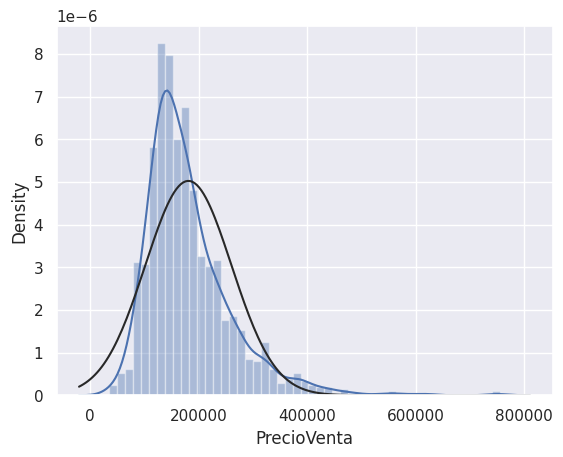

In [ ]:
# Histograma
sns.distplot(house_df['PrecioVenta'], fit = norm)
plt.plot()

**Conclusión**  
A simple vista se pueden apreciar:

- Una desviación con respecto a la distribución normal.
- Una asimetría positiva.
- Algunos picos.

Podemos comprobar nuestras conclusiones matemáticamente.

In [ ]:
# Asimetría y curtosis:
print("Skewness: %f" % house_df['PrecioVenta'].skew())
print("Kurtosis: %f" % house_df['PrecioVenta'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


La Curtosis es mayor que cero,  entonces la curva es leptocúrtica, por lo que hay mayor probabilidad de encontrar outliers.

In [ ]:
Image(url = "https://belenstgo.bigpress.net/images/showid/2755112")

La asimetría es positiva.

In [ ]:
Image(url = "https://www.mertxejbadiola.com/wp-content/uploads/2023/06/estadistica-tipos-de-asimetria-768x233-1.webp")

### Variables numéricas

Veamos las relaciones de las variables cuantitativas con el precio de las viviendas.

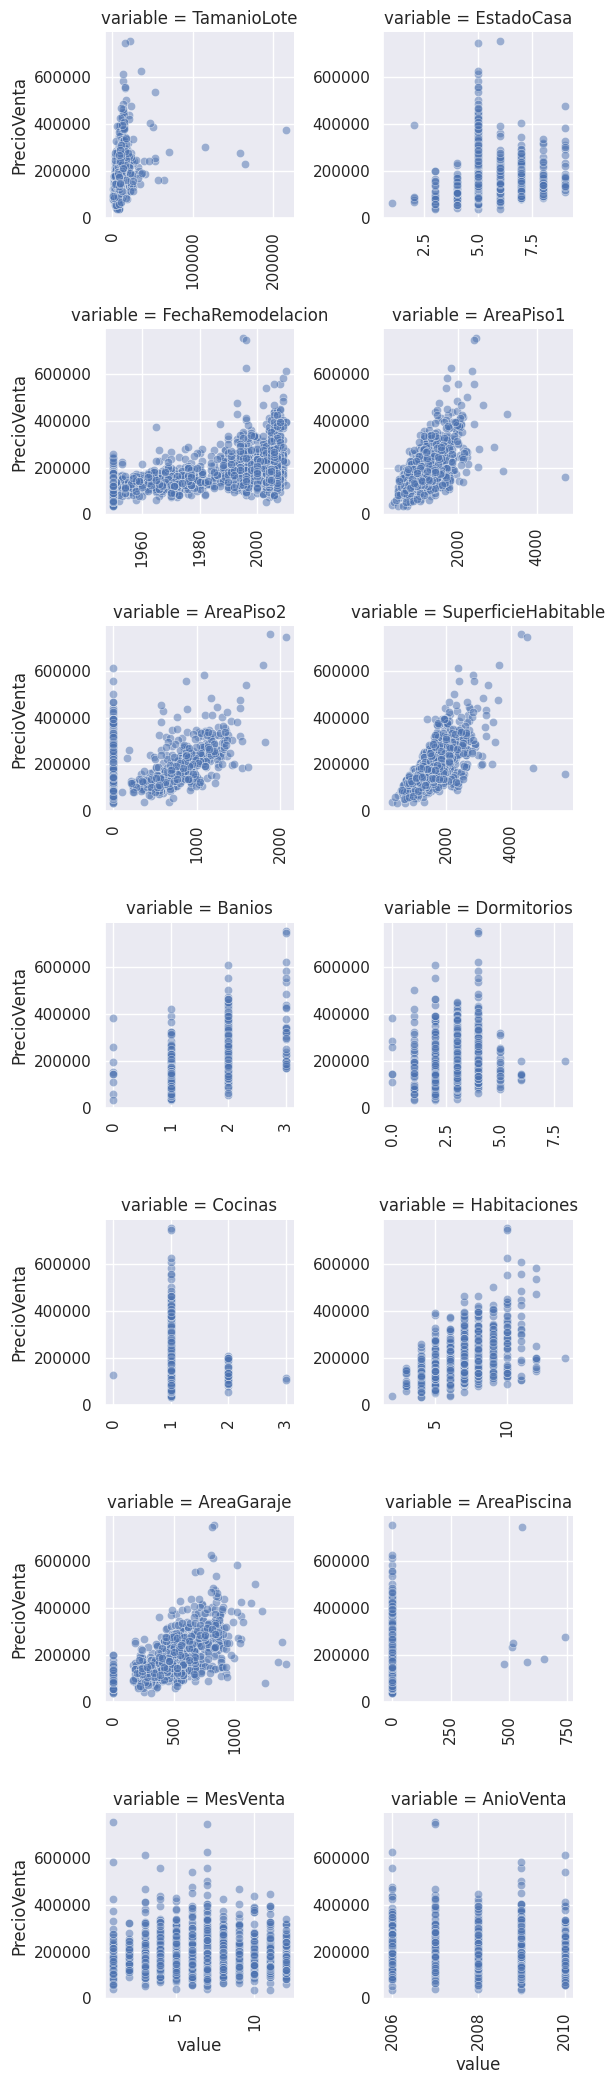

In [ ]:
# Diagrama de dispersión
def scatterplot_func(x, y, **kwargs):
    sns.scatterplot(x=x, y=y, alpha = 0.5)
    x=plt.xticks(rotation=90)

# Le aplicamos unpivot al dataframe por cada variable cuantitativa
f = pd.melt(frame = house_df, id_vars=['PrecioVenta'], value_vars=quantitative)
# Creamos las parcelas donde colocaremos nuestros gráficos
g = sns.FacetGrid(data = f, col="variable",  col_wrap=2, sharex=False, sharey=False)
# Poblamos las parcelas con los gráficos
g = g.map(scatterplot_func, "value", "PrecioVenta")

In [ ]:
from ipywidgets import interact
@interact(col1 = quantitative)
def scatterplot_func(col1):
    sns.scatterplot(x=col1, y='PrecioVenta', data = house_df, alpha = 0.5)
    x=plt.xticks(rotation=90)
    plt.title("{} vs Precio de Venta".format(col1))
    plt.xlabel(col1)
    plt.ylabel('PrecioVenta')
    plt.show()

interactive(children=(Dropdown(description='col1', options=('TamanioLote', 'EstadoCasa', 'FechaRemodelacion', …

**Conclusión:**
- 'AreaPiso1' y 'SuperficieHabitable' mantienen una relación lineal positiva con 'PrecioVenta', aumentando en el mismo sentido.

### Variables cualitativas

Con variables cualitativas podemos implementar dos métodos:  
1. Verificar la distribución de PrecioVenta con respecto a los valores de las variables y enumerarlos.
2. Crear una variable ficticia para cada categoría posible.

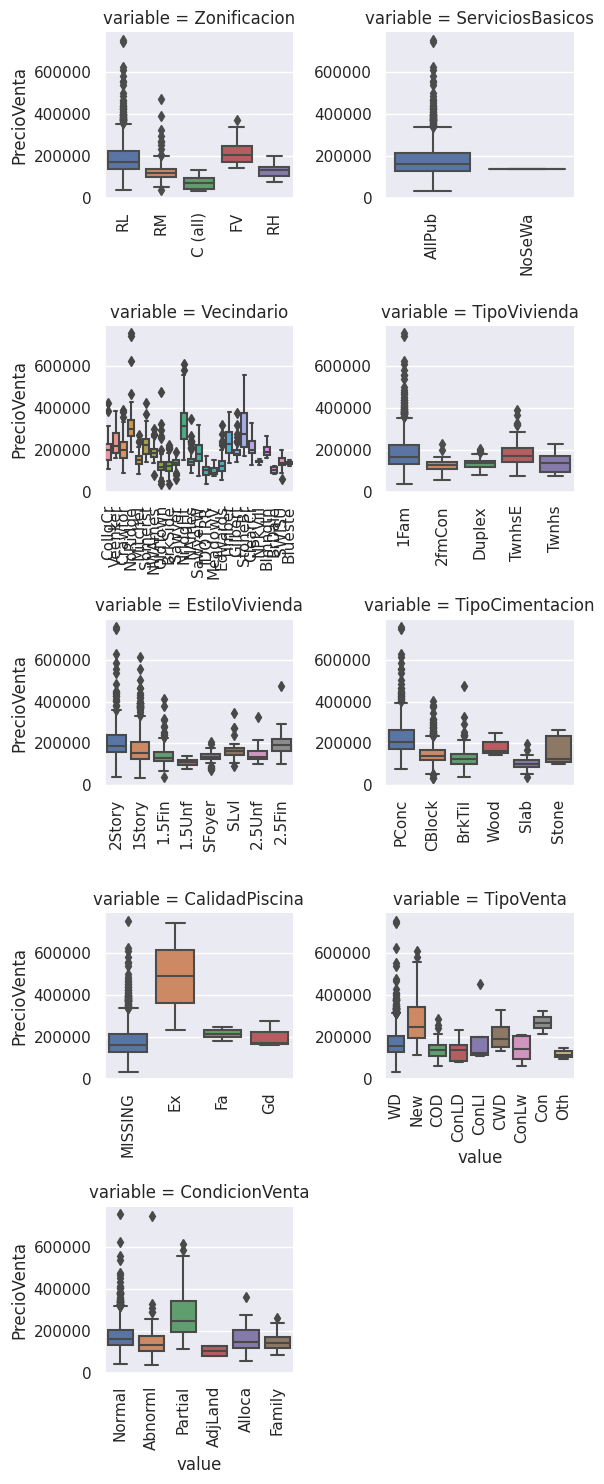

In [ ]:
def variable_categorica(df, qualitative):
  for c in qualitative:
    #convertimos a categoría
    df[c] = df[c].astype('category')
    if(df[c].isnull().any()):
      #Aniadimos la categoría missing en caso existan valores nan
      df[c] = df[c].cat.add_categories(['MISSING'])
      df[c] = df[c].fillna('MISSING')
variable_categorica(house_df, qualitative)

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

# Le aplicamos unpivot al dataframe por cada variable cualitativa
f = pd.melt(house_df, id_vars=['PrecioVenta'], value_vars=qualitative)
# Creamos las parcelas donde colocaremos nuestros gráficos
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
# Poblamos las parcelas con los gráficos
g = g.map(boxplot, "value", "PrecioVenta")

**Conclusión**  

- El **vecindario** tiene un gran impacto en los precios de la vivienda.  
- Lo más caro parece ser la **condición de venta** parcial.
- Tener **piscina** en la propiedad parece mejorar sustancialmente el precio.
- Existen diferencias en las variabilidades entre los valores de las categorías.

### Test ANOVA

ANOVA, o análisis de varianza, es una técnica estadística utilizada para comparar las medias de tres o más grupos independientes.   
La idea subyacente es determinar si hay alguna diferencia significativa entre las medias de los grupos.

- Hipótesis nula (H0): Esta hipótesis asume que no hay diferencias significativas entre las medias de los grupos. En términos estadísticos, se expresa como:

  $H_0: \mu_1 = \mu_2 = \mu_3 = \ldots = \mu_k$

  Donde $\mu_1$, $\mu_2$, ..., $\mu_k$ son las medias de los grupos, y $k$ es el número de grupos.

- Hipótesis alternativa (H1): Esta hipótesis sugiere que al menos dos medias de los grupos son diferentes entre sí. En términos estadísticos, se expresa como:

  $H_1$: Al menos una  $\mu_i$ es diferente de las demás.


¿El Vecindario tiene alguna repercusión en el precio?

- Hipótesis nula (H0): No hay diferencias significativas en los precios de venta entre los diferentes vecindarios:

  $H_0: \mu_1 = \mu_2 = \mu_3 = \ldots = \mu_k$

  Donde $\mu_1$, $\mu_2$, ..., $\mu_k$ son las medias de los precios de venta en cada vecindario y $k$ es el número de vecindarios.

- Hipótesis alternativa (H1): Existen diferencias significativas en los precios de venta entre al menos dos vecindarios:

  $H_1$: Al menos una  $\mu_i$ es diferente de las demás.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('PrecioVenta ~ Vecindario', data=house_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq      df          F         PR(>F)
Vecindario  5.023606e+12    24.0  71.784865  1.558600e-225
Residual    4.184305e+12  1435.0        NaN            NaN

p-value = $1.558*(10^{-255}) < 0.05$, por lo tanto se rechaza la hipótesis nula. Significa que hay evidencia suficiente para decir que al menos dos vecindarios tienen precios de venta diferentes.

El ANOVA asume que cada muestra proviene de una distribución normal.

### Encoding

Una forma de encodear es creando variables dummy(binarias).

In [ ]:
house_df_dummies = pd.get_dummies(data = house_df, prefix_sep='_', columns=qualitative)

In [ ]:
house_df["Zonificacion"].unique()

['RL', 'RM', 'C (all)', 'FV', 'RH']
Categories (5, object): ['C (all)', 'FV', 'RH', 'RL', 'RM']

In [ ]:
palabra_buscar = "Zonificacion"
columnas_contiene_palabra = [col for col in house_df_dummies.columns.to_list() if palabra_buscar in col]
house_df_dummies[columnas_contiene_palabra].sample(5)

Zonificacion_C (all)  Zonificacion_FV  Zonificacion_RH  Zonificacion_RL  \
234                     0                0                0                1   
772                     0                0                0                1   
777                     0                0                0                1   
346                     0                0                0                1   
558                     0                0                0                1   

     Zonificacion_RM  
234                0  
772                0  
777                0  
346                0  
558                0

Sin embargo la categorías que tenemos parecen tener un **orden** particular. Una vivienda que tenga piscina debería ser de mayor categoría que una que no tenga!!!

Vamos a encodear de acuerdo a la media del precio de venta para cada categoría, de esta forma podemos encodear variables ordinales(o aparentemente ordinales).

In [ ]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    #Guardamos los valores únicos de cada variable cualitativa
    ordering['ValoresUnicos'] = frame[feature].unique()
    #Los índices de nuestro df serán estas categorías
    ordering.index = ordering.ValoresUnicos
    #Hallamos la media del precio de venta por cada valor único de la variable categórica
    ordering['PrecioVentaMedia'] = frame[[feature, 'PrecioVenta']].groupby(feature).mean()['PrecioVenta']
    #Ordenamos nuestro df de acuerdo a la media del precio de venta
    ordering = ordering.sort_values('PrecioVentaMedia')
    #Asignamos un valor de orden a cada valor único
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()

    #Creamos nuestros campos encodeados en nuestro dataframe
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o

#Guardamos los nombres de columnas encodeadas en una lista
qual_encoded = []
for q in qualitative:
    encode(house_df, q)
    qual_encoded.append(q+'_E')
#Mostramos los campos encodeados
print(qual_encoded)

['Zonificacion_E', 'ServiciosBasicos_E', 'Vecindario_E', 'TipoVivienda_E', 'EstiloVivienda_E', 'TipoCimentacion_E', 'CalidadPiscina_E', 'TipoVenta_E', 'CondicionVenta_E']


In [ ]:
house_df[["TipoCimentacion", "TipoCimentacion_E"]].sample(5)

TipoCimentacion  TipoCimentacion_E
1376          BrkTil                2.0
339           CBlock                3.0
1227          CBlock                3.0
594           CBlock                3.0
47             PConc                6.0

## 3.Análisis bivariable

Generalmente solo se deben agregar variables no correlacionadas entre sí a los modelos de regresión (que están correlacionados con el precio de venta).

Para ello realizaremos las siguientes pruebas de correlación:

- Matriz de correlación general.
- Matriz de correlación centrada en la variable 'PrecioVenta'.
- Diagramas de dispersión entre las variables más correlacionadas.

### Matriz de correlación general

<Axes: >

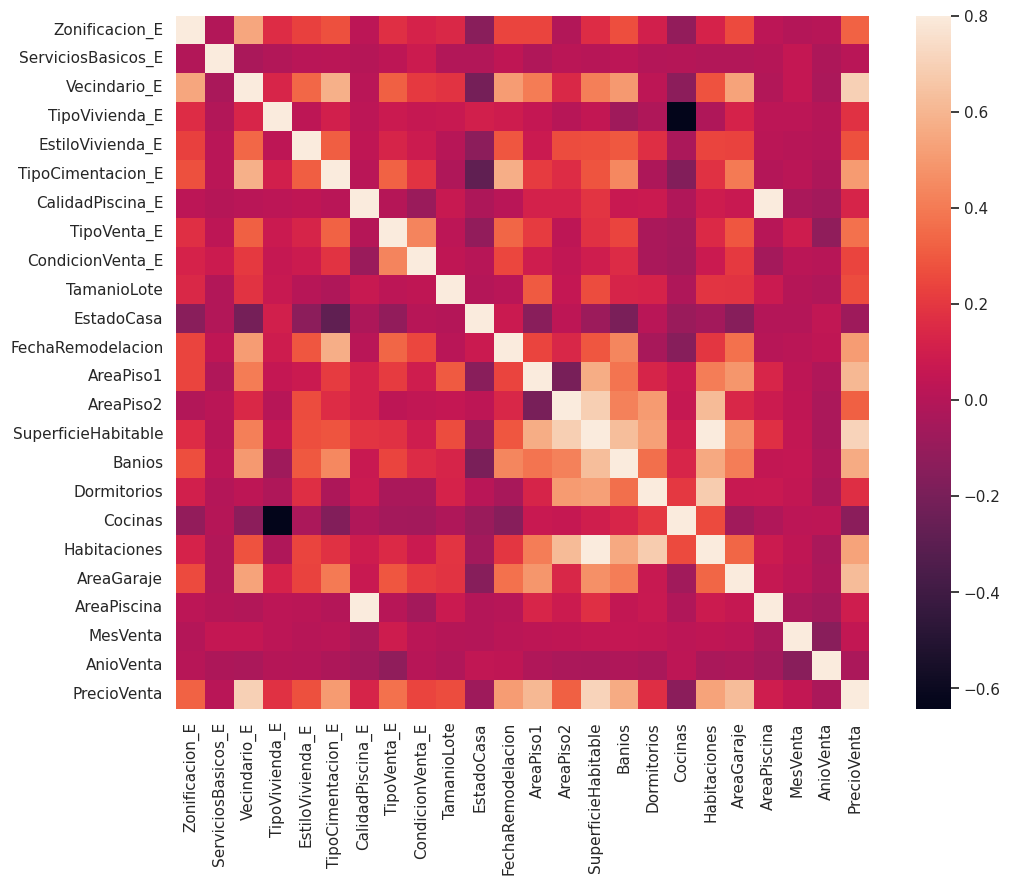

In [ ]:
# Matriz de correlación:
corrmat = house_df[qual_encoded + quantitative + ["PrecioVenta"]].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

Vayamos por partes!!!

<Axes: >

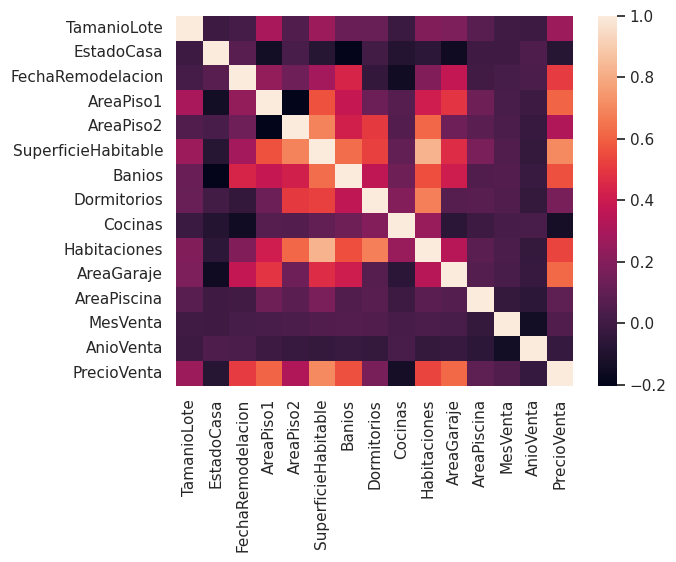

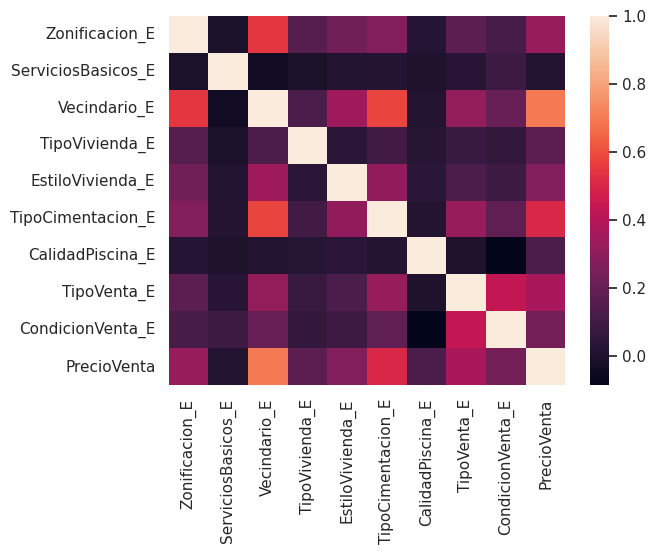

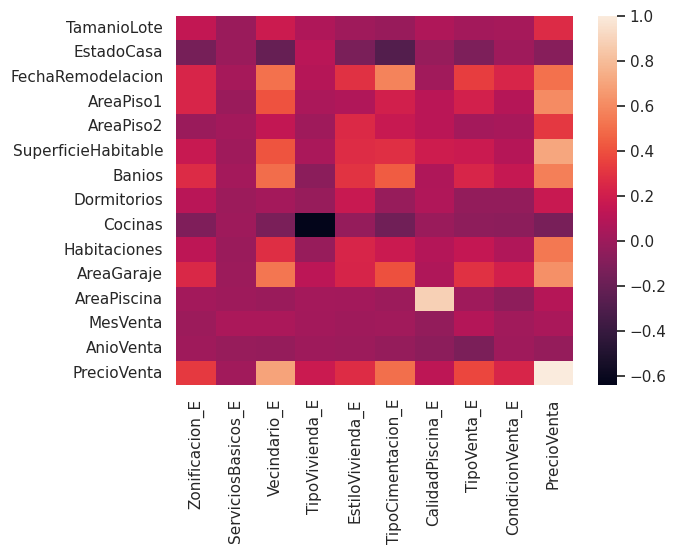

In [ ]:
# Realizamos el mismo diagrama pero por partes
sns.set(font_scale = 1.0)
plt.figure(1)
corr = house_df[quantitative+['PrecioVenta']].corr()
sns.heatmap(corr)

plt.figure(2)
corr = house_df[qual_encoded+['PrecioVenta']].corr()
sns.heatmap(corr)

plt.figure(3)
corr = pd.DataFrame(np.zeros([len(quantitative)+1, len(qual_encoded)+1]),
                    index=quantitative+['PrecioVenta'], columns=qual_encoded+['PrecioVenta'])
for q1 in quantitative+['PrecioVenta']:
    for q2 in qual_encoded+['PrecioVenta']:
        corr.loc[q1, q2] = house_df[q1].corr(house_df[q2])
sns.heatmap(corr)

### Matriz de correlación con la variable PrecioVenta

In [ ]:
corr = house_df[quantitative + qual_encoded + ["PrecioVenta"]].corr()[['PrecioVenta']]
corr.sort_values(by = 'PrecioVenta',ascending = False).style.background_gradient()

**Conclusión**  
- Hay muchas correlaciones fuertes entre las variables.
- El vecindario se correlaciona con muchas otras variables y esto confirma la idea de que las casas en la misma región comparten las mismas características.
- El tipo de vivienda se correlaciona negativamente con el número de cocinas.
- 'Banios' también está correlacionada con 'PrecioVenta', 'Habitaciones' y 'SuperficieHabitable'. Tenemos **multicolinealidad!!!**
- 'Habitaciones' y 'SuperficieHabitable', otro caso de **multicolinealidad!!!**.

Podemos seguir ahondando y analizar la relación entre las variables correlacionadas.

## 4.Datos limpios, modelos brillantes.



### Datos desaparecidos

Antes de tratar los datos faltantes, es importante determinar su prevalencia y su aleatoriedad, ya que pueden implicar una reducción del tamaño de la muestra.

In [ ]:
# Missing data:
total = house_df.isnull().sum().sort_values(ascending = False)
percent = (house_df.isnull().sum() / house_df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

Total  Percent
Id                      0      0.0
Zonificacion_E          0      0.0
CalidadPiscina          0      0.0
MesVenta                0      0.0
AnioVenta               0      0.0
TipoVenta               0      0.0
CondicionVenta          0      0.0
PrecioVenta             0      0.0
ServiciosBasicos_E      0      0.0
Zonificacion            0      0.0
Vecindario_E            0      0.0
TipoVivienda_E          0      0.0
EstiloVivienda_E        0      0.0
TipoCimentacion_E       0      0.0
CalidadPiscina_E        0      0.0
TipoVenta_E             0      0.0
AreaPiscina             0      0.0
AreaGaraje              0      0.0
Habitaciones            0      0.0
Cocinas                 0      0.0

Una imagen vale más que mil palabras!!!

In [ ]:
missing = house_df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
if missing.shape[0] > 0:
  missing.plot.bar()
else:
  print("No tenemos valores nulos.")

No tenemos valores nulos.


**Conclusión**  
No tenemos valores nulos.

### ====================================================

Para esta parte probaremos con otro dataset para explicar el tratamiento de valores desaparecidos.

In [ ]:
melb_data_df = pd.read_csv('https://raw.githubusercontent.com/Juniorcandela/datasets/main/melb_data.csv')
melb_data_df.head()

Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN        Yarra  -37.7996    144.9984  Northern Metropolitan   
1     1900.0        Yarra  -37.8079    144.9934  Northern Metropolitan   
2     1900.0        Yarra  -37.8093    144.9944  Northern Metropolitan   
3        NaN        Yarra  -37.7969    144.9969  Northern Metropolitan   
4     2014.0        Yarra  -37.8072    144.9941  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

In [ ]:
total = melb_data_df.isnull().sum().sort_values(ascending = False)
percent = (melb_data_df.isnull().sum() / melb_data_df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

Total   Percent
BuildingArea   6450  0.474963
YearBuilt      5375  0.395803
CouncilArea    1369  0.100810
Car              62  0.004566
Suburb            0  0.000000
Bathroom          0  0.000000
Regionname        0  0.000000
Longtitude        0  0.000000
Lattitude         0  0.000000
Landsize          0  0.000000
Bedroom2          0  0.000000
Address           0  0.000000
Postcode          0  0.000000
Distance          0  0.000000
Date              0  0.000000
SellerG           0  0.000000
Method            0  0.000000
Price             0  0.000000
Type              0  0.000000
Rooms             0  0.000000

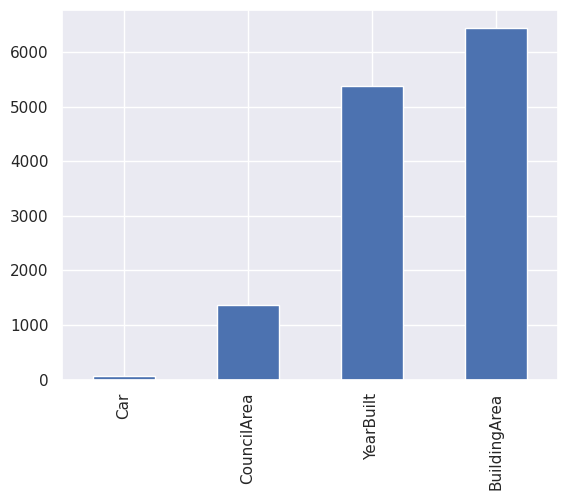

In [ ]:
missing = melb_data_df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
if missing.shape[0] > 0:
  missing.plot.bar()
else:
  print("No tenemos valores nulos.")

#### Enfoque 1: Eliminar columnas con valores NaN

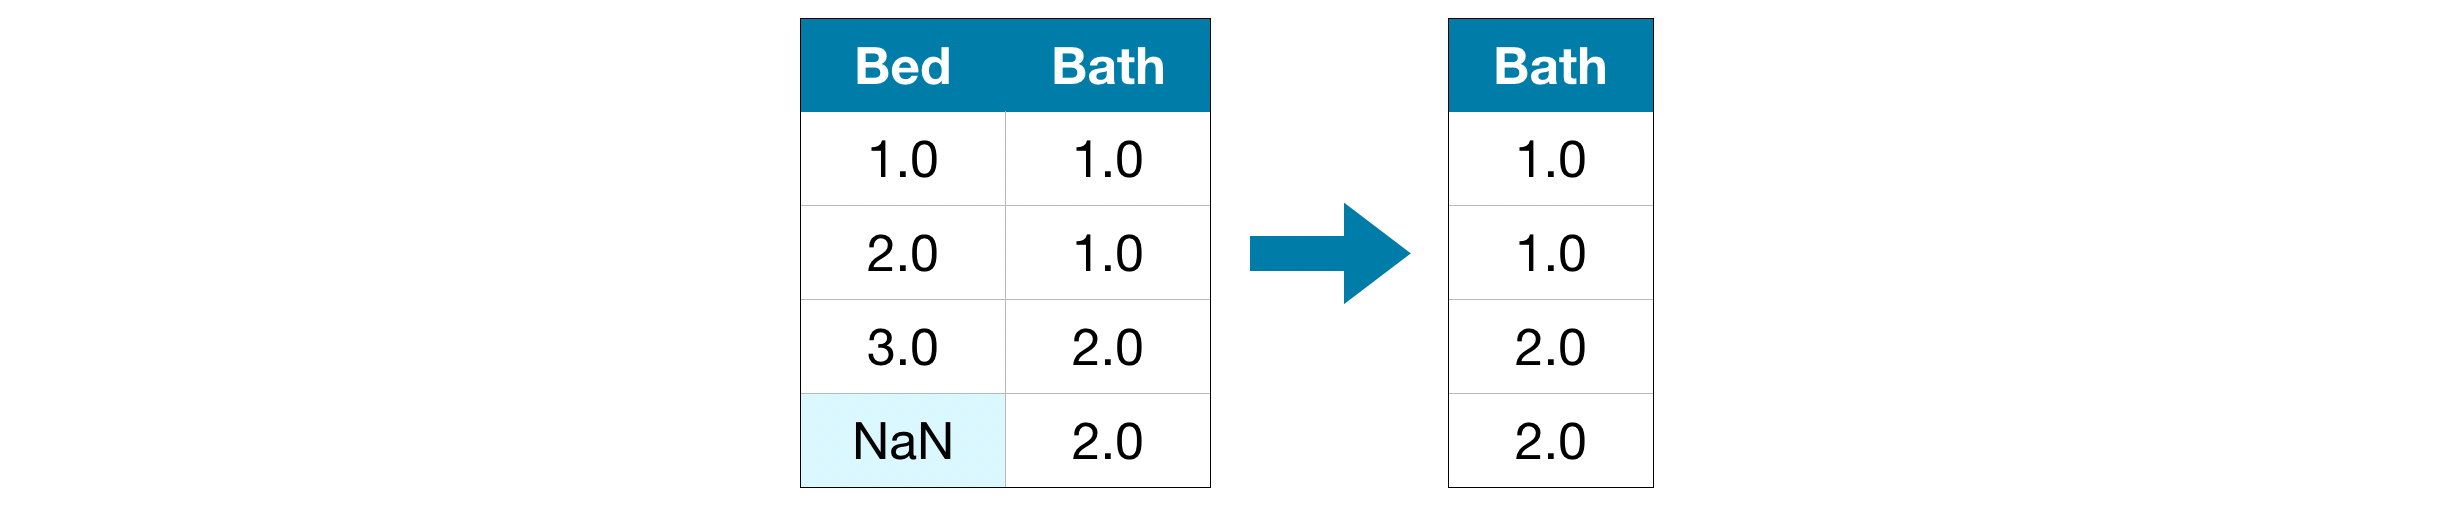

In [ ]:
# Obtenemos nombres de las columnas con los valores perdidos
cols_with_missing = [col for col in melb_data_df.columns
                     if melb_data_df[col].isnull().any()]

# Eliminamos las columnas con NaN
reduced_data = melb_data_df.drop(cols_with_missing, axis=1)

In [ ]:
reduced_data.head()

Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  Bedroom2  Bathroom  Landsize  Lattitude  \
0  3/12/2016       2.5    3067.0       2.0       1.0     202.0   -37.7996   
1  4/02/2016       2.5    3067.0       2.0       1.0     156.0   -37.8079   
2  4/03/2017       2.5    3067.0       3.0       2.0     134.0   -37.8093   
3  4/03/2017       2.5    3067.0       3.0       2.0      94.0   -37.7969   
4  4/06/2016       2.5    3067.0       3.0       1.0     120.0   -37.8072   

   Longtitude             Regionname  Propertycount  
0    144.9984  Northern Metropolitan         4019.0  
1    144.9934  Northern Metropolitan         4019.0  
2    144.9944  Northern Metropolitan         4019.0  
3    144.9969  Northern Metropolitan         4019.0  
4    144.9941  Northern Metropolitan         4019.0

In [ ]:
columnas_eliminadas = set(melb_data_df.columns) - set(reduced_data.columns)
print("Hemos eliminado las siguientes columnas:")
print(columnas_eliminadas)

Hemos eliminado las siguientes columnas:
{'Car', 'YearBuilt', 'CouncilArea', 'BuildingArea'}


#### Enfoque 2: Imputar por algún valor

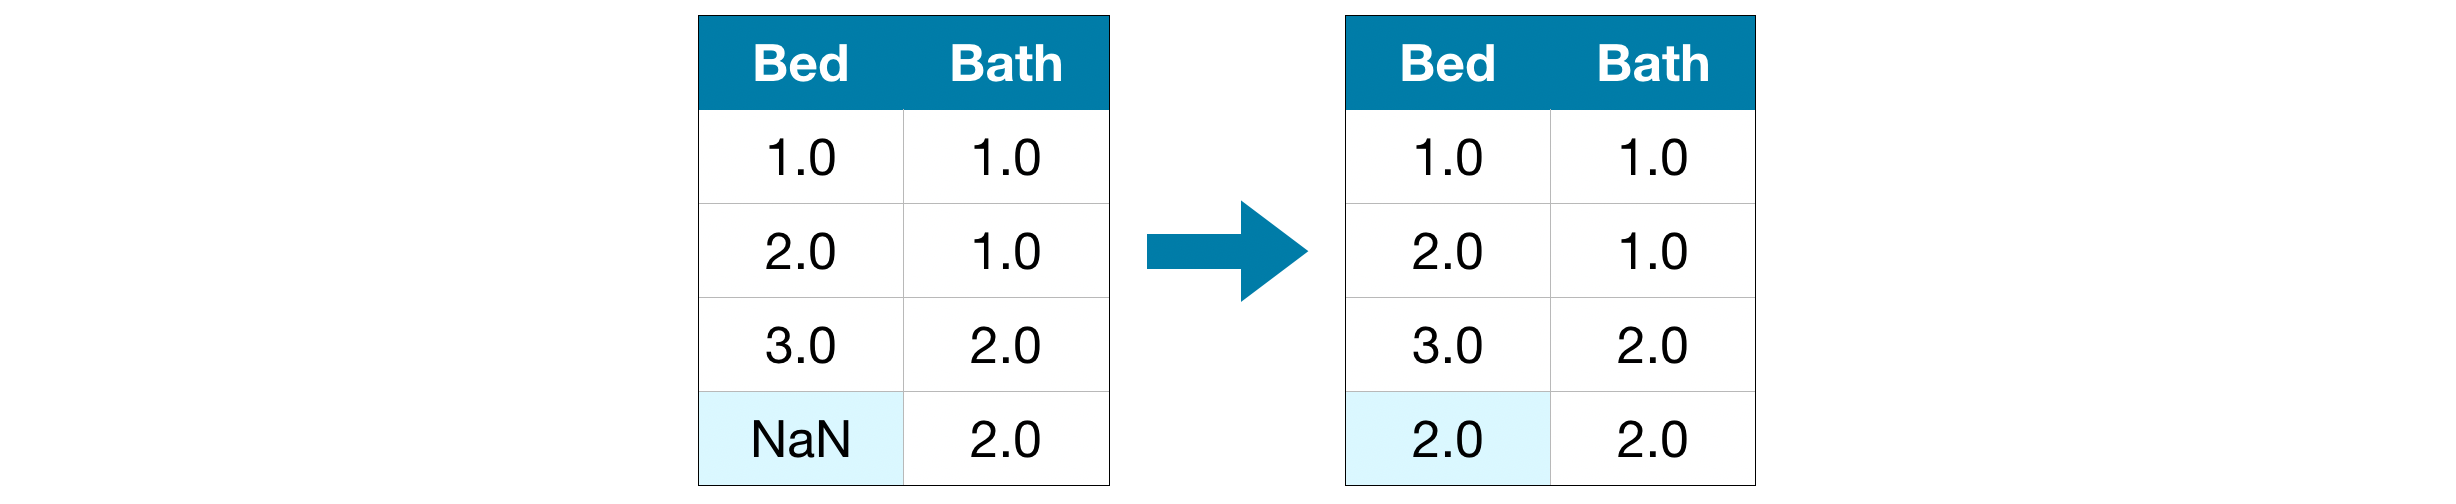

In [ ]:
melb_data_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
from sklearn.impute import SimpleImputer
data = melb_data_df.select_dtypes(exclude=['object'])

# Creamos objeto de imputación
my_imputer = SimpleImputer(strategy='mean')

# Imputamos
imputed_data = pd.DataFrame(my_imputer.fit_transform(data), columns = data.columns)

In [ ]:
#Antes
melb_data_df[['BuildingArea', 'YearBuilt', 'Car']].head()

BuildingArea  YearBuilt  Car
0           NaN        NaN  1.0
1          79.0     1900.0  0.0
2         150.0     1900.0  0.0
3           NaN        NaN  1.0
4         142.0     2014.0  2.0

In [ ]:
#Después
imputed_data[['BuildingArea', 'YearBuilt', 'Car']].head()

BuildingArea    YearBuilt  Car
0     151.96765  1964.684217  1.0
1      79.00000  1900.000000  0.0
2     150.00000  1900.000000  0.0
3     151.96765  1964.684217  1.0
4     142.00000  2014.000000  2.0

#### Enfoque 3: Imputar NaN y categorizar

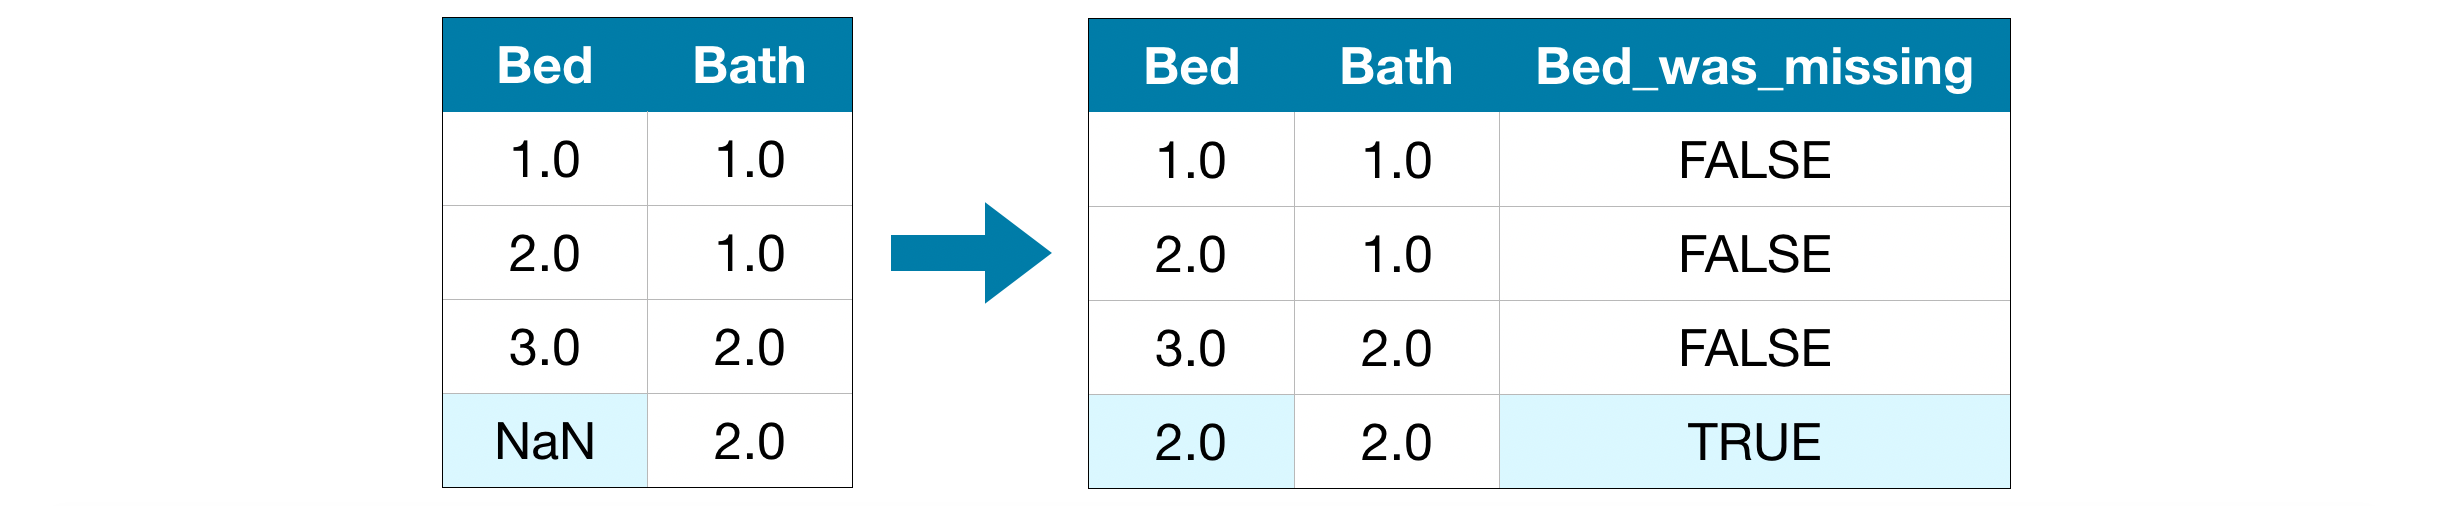

In [ ]:
# Haga una copia para no modificar los datos originales (al imputar)
data_plus = data.copy()

# Hallamos las columnas con valores missing
cols_with_missing = [col for col in data.columns
                     if data[col].isnull().any()]

# Creamos las columnas de la forma col + '_was_missing' antes de imputar
for col in cols_with_missing:
    data_plus[col + '_was_missing'] = data_plus[col].isnull()

# Imputamos
my_imputer = SimpleImputer(strategy = 'mean')
imputed_data_plus = pd.DataFrame(my_imputer.fit_transform(data_plus), columns = data_plus.columns)

In [ ]:
columnas_imputadas = ['BuildingArea', 'YearBuilt', 'Car']
columnas_imputadas_missing = imputed_data_plus.filter(like='missing').columns.tolist()

In [ ]:
imputed_data_plus[columnas_imputadas + columnas_imputadas_missing].head()

BuildingArea    YearBuilt  Car  Car_was_missing  BuildingArea_was_missing  \
0     151.96765  1964.684217  1.0              0.0                       1.0   
1      79.00000  1900.000000  0.0              0.0                       0.0   
2     150.00000  1900.000000  0.0              0.0                       0.0   
3     151.96765  1964.684217  1.0              0.0                       1.0   
4     142.00000  2014.000000  2.0              0.0                       0.0   

   YearBuilt_was_missing  
0                    1.0  
1                    0.0  
2                    0.0  
3                    1.0  
4                    0.0

#### Enfoque 4: Imputar por la media del grupo

In [ ]:
data = melb_data_df.copy()

# Calcular la media por grupo y asignarla a los NaN en 'Valor'
data['BuildingArea'] = data.groupby('Suburb')['BuildingArea'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
data[['BuildingArea', 'Suburb']].head()

BuildingArea      Suburb
0         103.0  Abbotsford
1          79.0  Abbotsford
2         150.0  Abbotsford
3         103.0  Abbotsford
4         142.0  Abbotsford

In [ ]:
melb_data_df[['BuildingArea', 'Suburb']].head()

BuildingArea      Suburb
0           NaN  Abbotsford
1          79.0  Abbotsford
2         150.0  Abbotsford
3           NaN  Abbotsford
4         142.0  Abbotsford

In [ ]:
melb_data_df.groupby('Suburb')['BuildingArea'].mean()[:5]

Suburb
Abbotsford      103.000000
Aberfeldie      163.692000
Airport West    135.272895
Albanvale       123.000000
Albert Park     123.485294
Name: BuildingArea, dtype: float64

#### Enfoque 5: Imputar por la media del grupo basada en quantiles  
Para ello debemos buscar un campo numérico que tenga alta correlación con nuestro variable a imputar y tenga pocos NaN.

<Axes: >

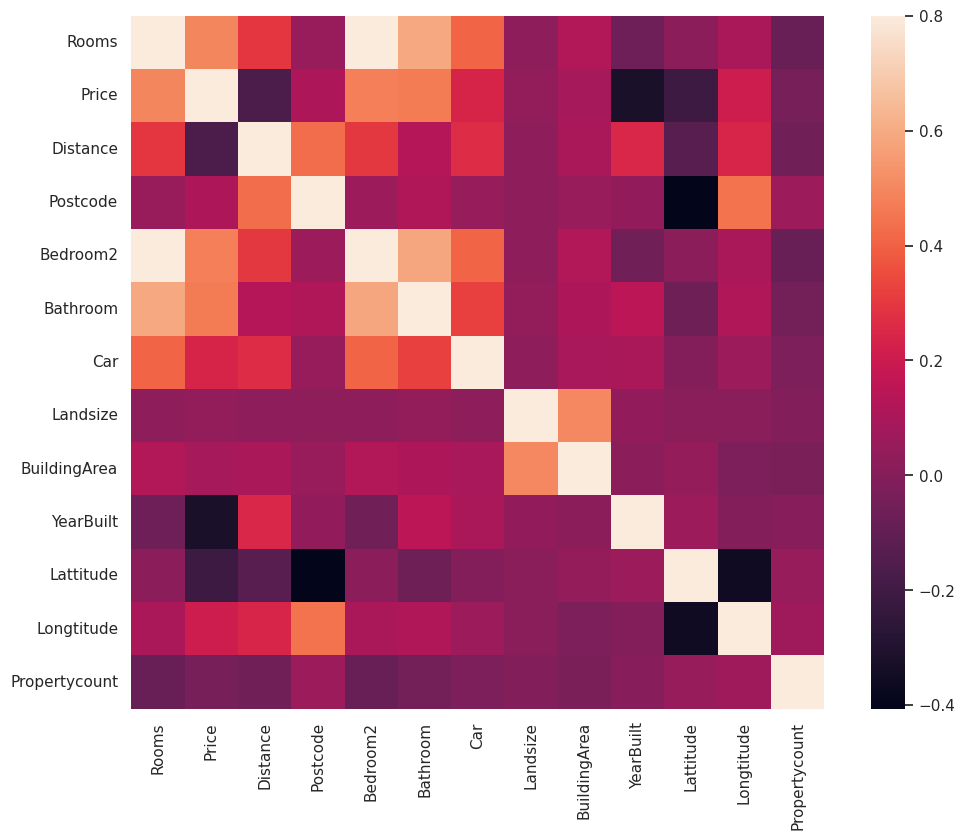

In [ ]:
# Matriz de correlación:
data = melb_data_df.copy()
corrmat = melb_data_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

Elegimos Landsize. Ahora veamos la cantidad de nulos.

In [ ]:
data['Landsize'].isna().sum()

0

Muy bien, no tenemos nulos en Landsize.

Creamos los deciles.

In [ ]:
data['Landsize_Q'] = pd.qcut(data['Landsize'], q = 10, labels = False, precision=0, duplicates='drop')
data[['BuildingArea','Landsize', 'Landsize_Q']].head()

BuildingArea  Landsize  Landsize_Q
0           NaN     202.0           1
1          79.0     156.0           1
2         150.0     134.0           0
3           NaN      94.0           0
4         142.0     120.0           0

In [ ]:
# Calcular la media por grupo y asignarla a los NaN en 'Valor'
data['BuildingArea'] = data.groupby('Landsize_Q')['BuildingArea'].transform(lambda x: x.fillna(x.median()))
data[['BuildingArea','Landsize', 'Landsize_Q']].head()

BuildingArea  Landsize  Landsize_Q
0         107.0     202.0           1
1          79.0     156.0           1
2         150.0     134.0           0
3          78.0      94.0           0
4         142.0     120.0           0

### ====================================================

### Datos duplicados

In [ ]:
house_df[house_df.duplicated()].shape

(0, 34)

In [ ]:
house_df = house_df.drop_duplicates()
house_df.shape

(1460, 34)

**Conclusión**  
Nuestro dataset no tiene registros duplicados.

### Datos atípicos

**Outliers**  
Pueden tener un impacto **desproporcionado** en los resultados de un análisis de datos si no se manejan adecuadamente.

Para detectar datos atípicos una medida general es considerar outliers aquellos valores con una puntuación Z (z score) mayor de 3, esto es, que se alejan 3 veces o mas desviaciones standard de la media.

$$z(x)= \frac{x-\mu}{\sigma}$$

#### Análisis univariable

In [ ]:
from scipy import stats
import numpy as np

def outliers_col(df, columnas):
  for col in columnas:
    #Solo son outliers los que sobrepasan el z score de 3
    n_outliers = len(df[np.abs(stats.zscore(df[col])) > 3])
    print("{} | {}".format(df[col].name, n_outliers))
outliers_col(house_df, quantitative + ["PrecioVenta"])

TamanioLote | 13
EstadoCasa | 28
FechaRemodelacion | 0
AreaPiso1 | 12
AreaPiso2 | 4
SuperficieHabitable | 16
Banios | 0
Dormitorios | 14
Cocinas | 68
Habitaciones | 12
AreaGaraje | 7
AreaPiscina | 7
MesVenta | 0
AnioVenta | 0
PrecioVenta | 22


Debemos decidir qué hacer con estos Outliers. ¿Serán errores de registros o hechos perfectamente válidos?

**Conclusión**  
- Se han encontrado outliers en todas las variables, con excepción de las variables de fecha.

#### Análisis bivariable

También podemos hacer un análisis de outliers de cada variable respecto a la variable objetivo.

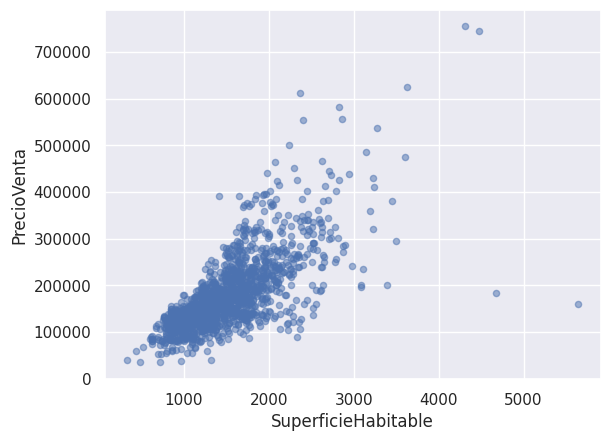

In [ ]:
# Análisis bivariable PrecioVenta/SuperficieHabitable:
var = 'SuperficieHabitable'
house_df.plot.scatter(x = 'SuperficieHabitable', y = 'PrecioVenta', alpha = 0.5);

Tenemos dos valores de superficies habitables que distorsionan nuestros resultados, procedemos a eliminarlos.

In [ ]:
ID_outlier = house_df.sort_values(by = 'SuperficieHabitable', ascending = False)[:2]["Id"].to_list()

In [ ]:
# Eliminación de valores:
house_df = house_df.drop(house_df[house_df['Id'].isin(ID_outlier)].index)

<Axes: xlabel='SuperficieHabitable', ylabel='PrecioVenta'>

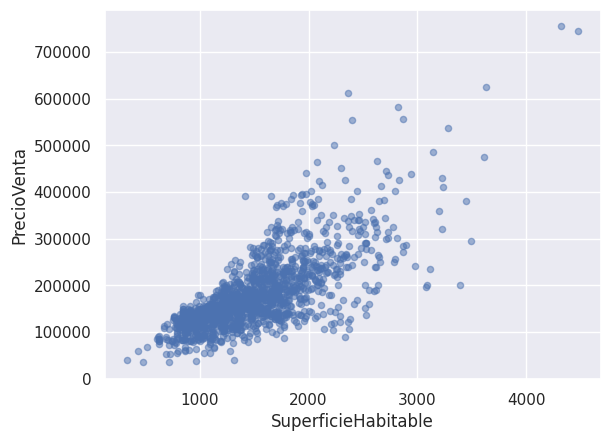

In [ ]:
# Análisis bivariable SalePrice/SuperficieHabitable:
var = 'SuperficieHabitable'
house_df.plot.scatter(x = 'SuperficieHabitable', y = 'PrecioVenta', alpha = 0.5)

**Conclusión**  
- Se han eliminado 2 outliers de la superficie habitable ya que distorsionaban los resultados de nuestro análisis.

## 5.Comprobando supuestos: Descubre la "verdad".

Hay que comprobar cuatro suposiciones fundamentales:

- Normalidad: Los datos deben parecerse a una distribución normal. Es importante porque varias pruebas estadísticas se basan en esta suposición. Si resolvemos la normalidad evitamos otros problemas, como la homocedasticidad.

- Homocedasticidad: Suposición de que las variables dependientes tienen el mismo nivel de varianza en todo el rango de las variables predictoras. La homocedasticidad es deseable porque queremos que el término de error sea el mismo en todos los valores de las variables independientes.

- Linealidad: La forma más común de evaluar la linealidad es examinar los **diagramas de dispersión** y buscar patrones lineales. Si los patrones no son lineales, valdría la pena explorar las transformaciones de datos.

- Ausencia de errores correlacionados - Esto ocurre a menudo en series temporales, donde algunos patrones están relacionados en el tiempo.

### Normalidad

El objetivo es estudiar la variable 'PrecioVenta' de forma fácil, comprobando:

- Histograma: Curtosis y asimetría.
- Gráfica de probabilidad normal: La distribución de los datos debe ajustarse a la diagonal que representa la distribución normal.
-Test de normalidad: Dos pruebas comunes son la Prueba de Shapiro-Wilk y la Prueba de Kolmogorov-Smirnov.


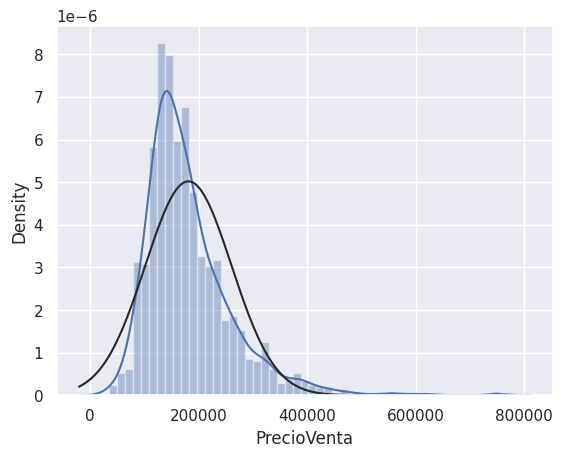

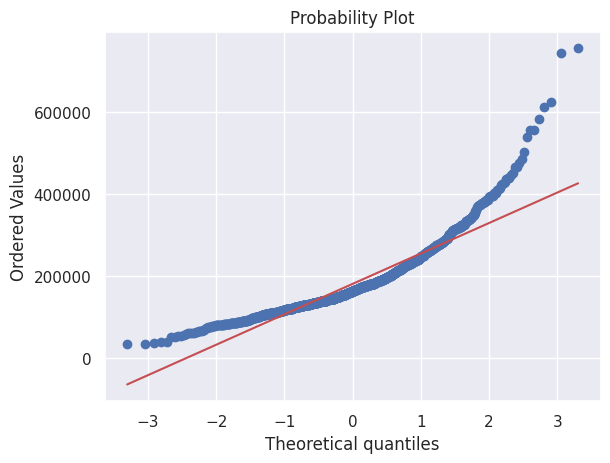

In [ ]:
# Histograma y gráfico de probabilidad normal:
sns.distplot(house_df['PrecioVenta'], fit = norm)
fig = plt.figure()
res = stats.probplot(house_df['PrecioVenta'], plot = plt)

Parece que PrecioVenta no se ajusta a una distribución normal.

De estos gráficos se desprende que 'PrecioVenta' no tiene una distribución normal. Muestra picos, asimetría positiva y no sigue la línea diagonal; aunque una simple transformación de datos puede resolver el problema.

### Test de normalidad  
Los Test de normalidad se utilizan para verificar si una muestra de datos sigue una distribución normal. Dos de los tests más comunes son:
- Test de Shapiro-Wilk:  Es una prueba estadística utilizada para evaluar si una muestra de datos proviene de una distribución normal. Es adecuado para muestras de tamaño moderado($n < 30$). Se plantean las siguientes hipótesis:
  - Hipótesis nula ($H_0$): La muestra sigue una distribución normal.
  - Hipótesis alternativa ($H_1$): La muestra no sigue una distribución normal.

- Test de Kolmogorov-Smirnov:  Es una prueba no paramétrica que determina la **bondad de ajuste** de dos distribuciones de probabilidad entre sí. Es aplicable para muestras grandes.  Para una distribución normal se plantean las siguientes hipótesis:
  - Hipótesis nula ($H_0$): La muestra sigue una distribución normal.
  - Hipótesis alternativa ($H_1$): La muestra no sigue una distribución normal.

¿Los precios de venta se ajustan a una distribución normal?

[]

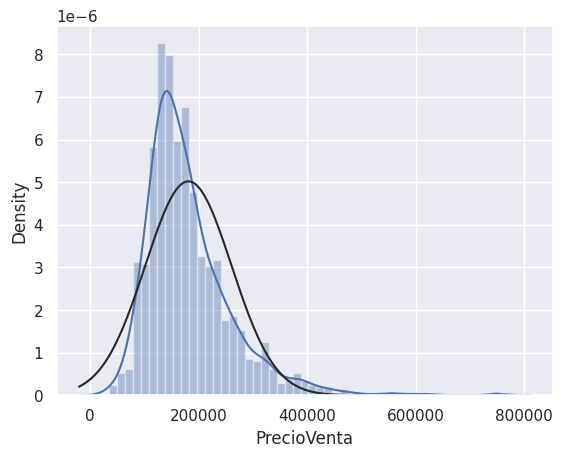

In [ ]:
# Histograma
sns.distplot(house_df['PrecioVenta'], fit = norm)
plt.plot()

In [ ]:
from scipy import stats
import numpy as np

stat_ks, p_value = sm.stats.diagnostic.kstest_normal(house_df["PrecioVenta"], dist = 'norm')
stat_ks, p_value

(0.12332001874102394, 0.0009999999999998899)

p-value < 0.05, por lo tanto los precios de venta de las viviendas no siguen una distribución normal.

In [ ]:
# Transformación de los datos:
house_df['PrecioVenta'] = np.log(house_df['PrecioVenta'])

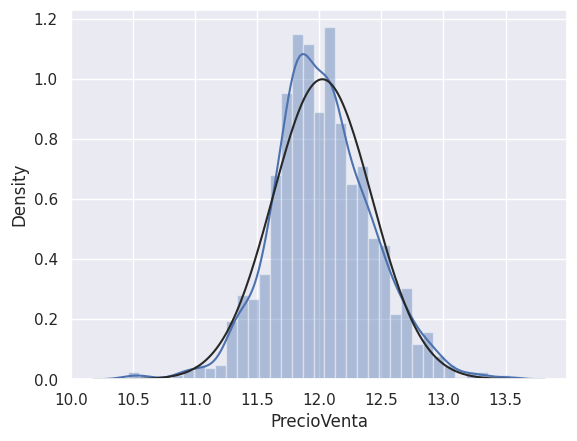

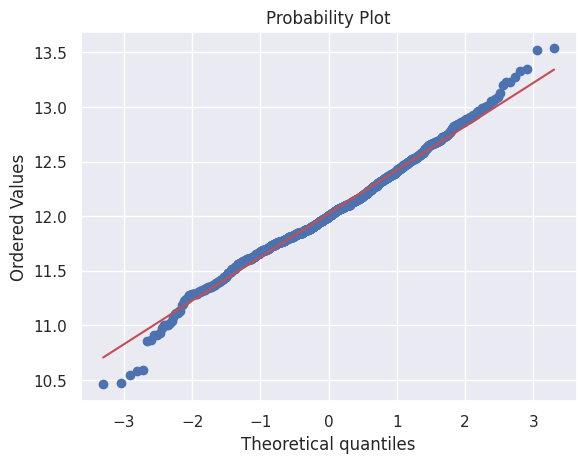

In [ ]:
# Histograma y gráfico de probabilidad normal sobre los datos transformados:
sns.distplot(house_df['PrecioVenta'], fit = norm)
fig = plt.figure()
res = stats.probplot(house_df['PrecioVenta'], plot = plt)

La normalidad no es una condición estrictamente necesaria en el análisis exploratorio de datos, y se deben considerar otros enfoques y técnicas según el tipo de datos y los objetivos del análisis.

Nuestra variable 'PrecioVenta' transformada ahora 'parece' seguir una distribución normal.

In [ ]:
import statsmodels.api as sm

stat_ks, p_value = sm.stats.diagnostic.kstest_normal(house_df["PrecioVenta"], dist = 'norm')
stat_ks, p_value

(0.040497913105319916, 0.0009999999999998899)

p < 0.05, entonces no se ajusta a una distribución normal.

Conclusión:
Los precios de venta aún no siguen una distribución normal, pero gráficamente se ve que está muy cerca.

*Una imagen vale más que mil palabras, pero una prueba de hipótesis vale más que mil imágenes🤭.*

## Conclusión general

- Hemos estudiado las variables, analizado 'PrecioVenta' a solas y con las variables más correlacionadas.
- Se ha lidiado con datos faltantes y valores atípicos.
- Se han probado algunos de los supuestos estadísticos fundamentales.
- Se han transformado las variables categóricas.
- Tenemos muchas variables más para analizar.

## Bonus

### Missingno

Proporciona un pequeño conjunto de herramientas de utilidades y visualizaciones de datos faltantes flexibles y fáciles de usar que le permiten obtener un resumen visual rápido de la integridad (o falta de integridad) de su conjunto de datos.

<Axes: >

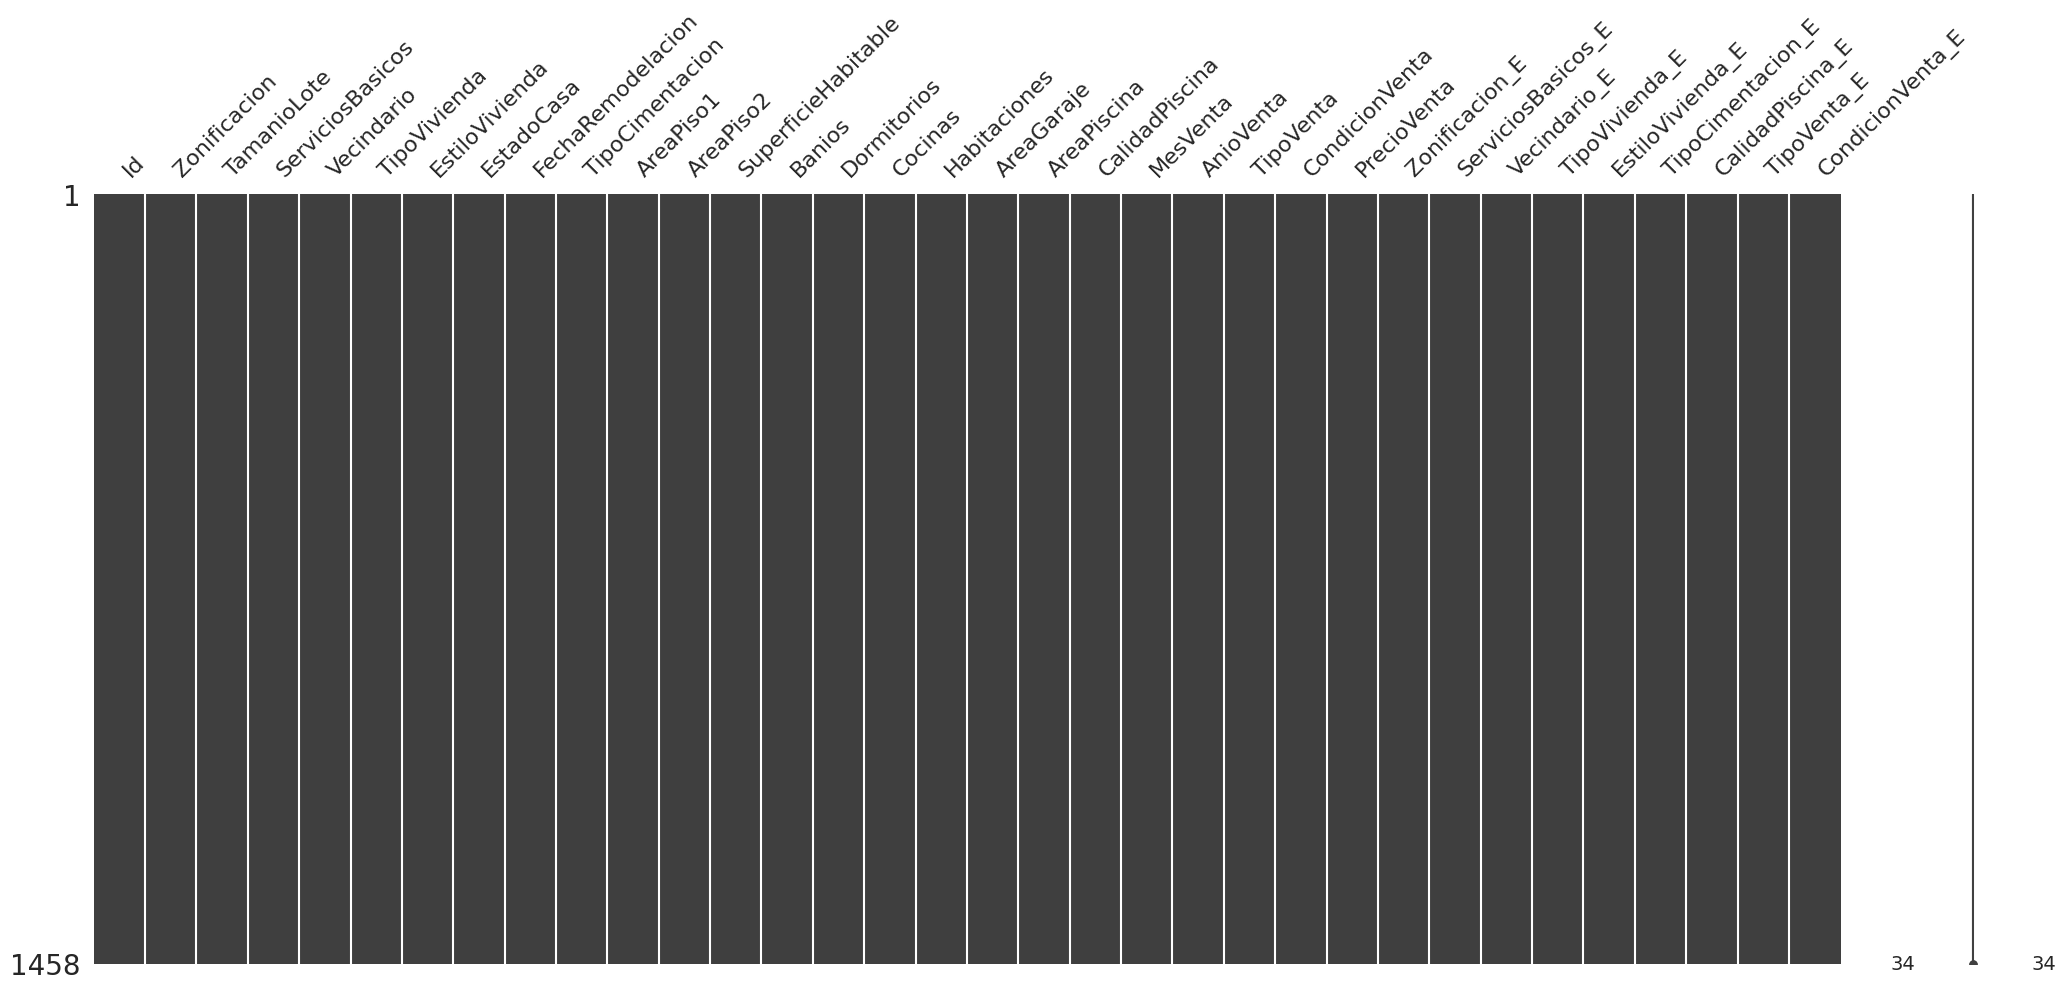

In [ ]:
import missingno as msno
msno.matrix(house_df)

<Axes: >

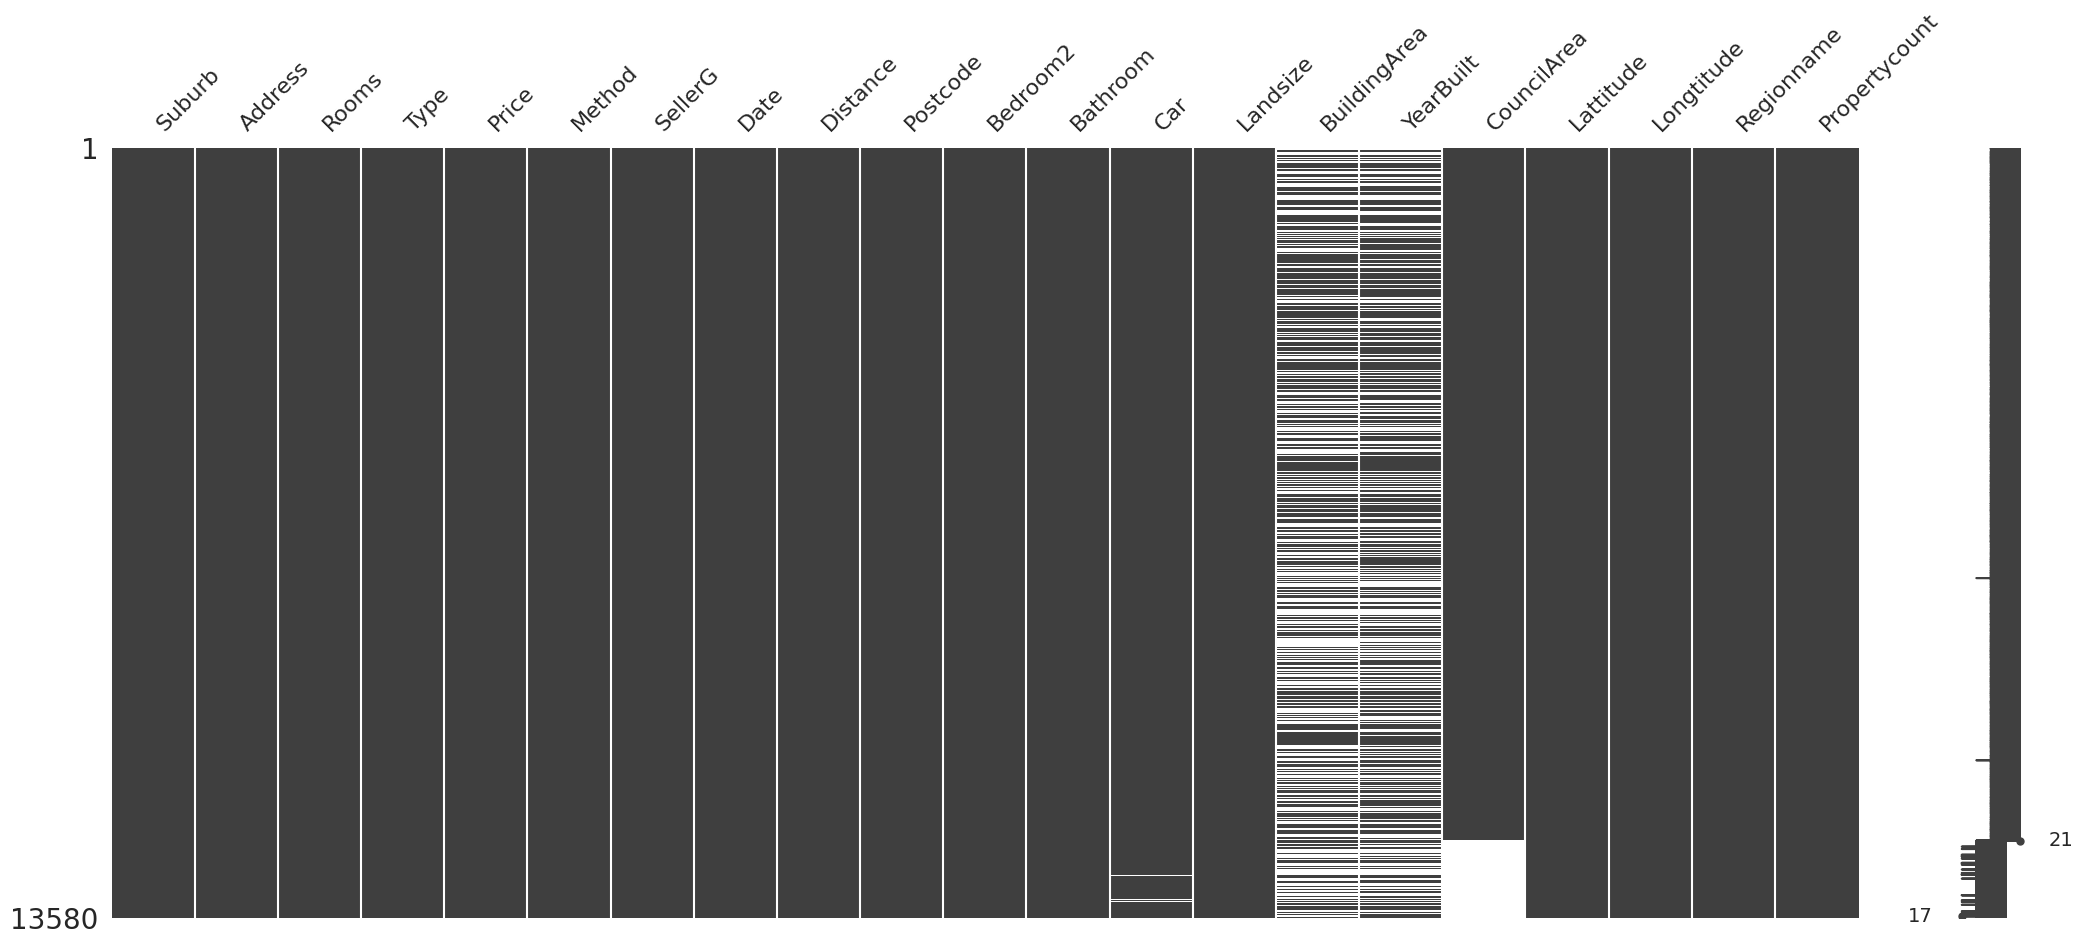

In [ ]:
import missingno as msno
melt_data = pd.read_csv("https://raw.githubusercontent.com/Juniorcandela/datasets/main/melb_data.csv")
msno.matrix(melt_data)

### AutoEDA con sweetviz

Algunas de las ventajas que nos brinda esta librería son las siguientes:
- Con sweetviz podemos hacer rápidamente un análisis exploratorio de datos con solo unas pocas líneas de código.
- También genera informes interactivos en formato web que pueden ser presentados a cualquier persona, aunque no sepa programar.

In [ ]:
#pip install sweetviz

                                             |          | [  0%]   00:00 -> (? left)


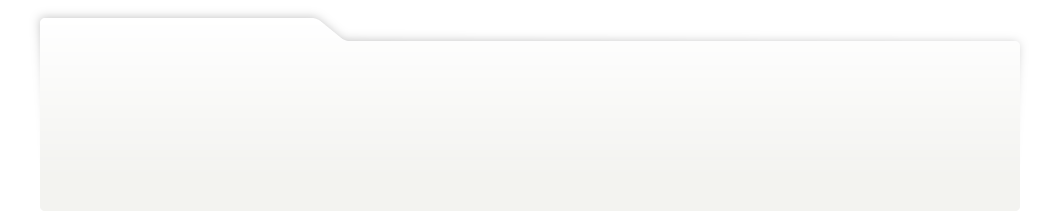
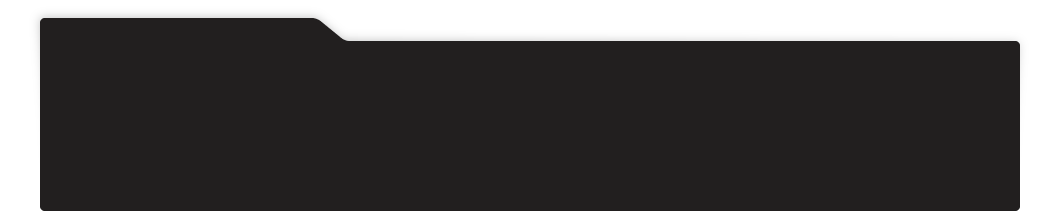
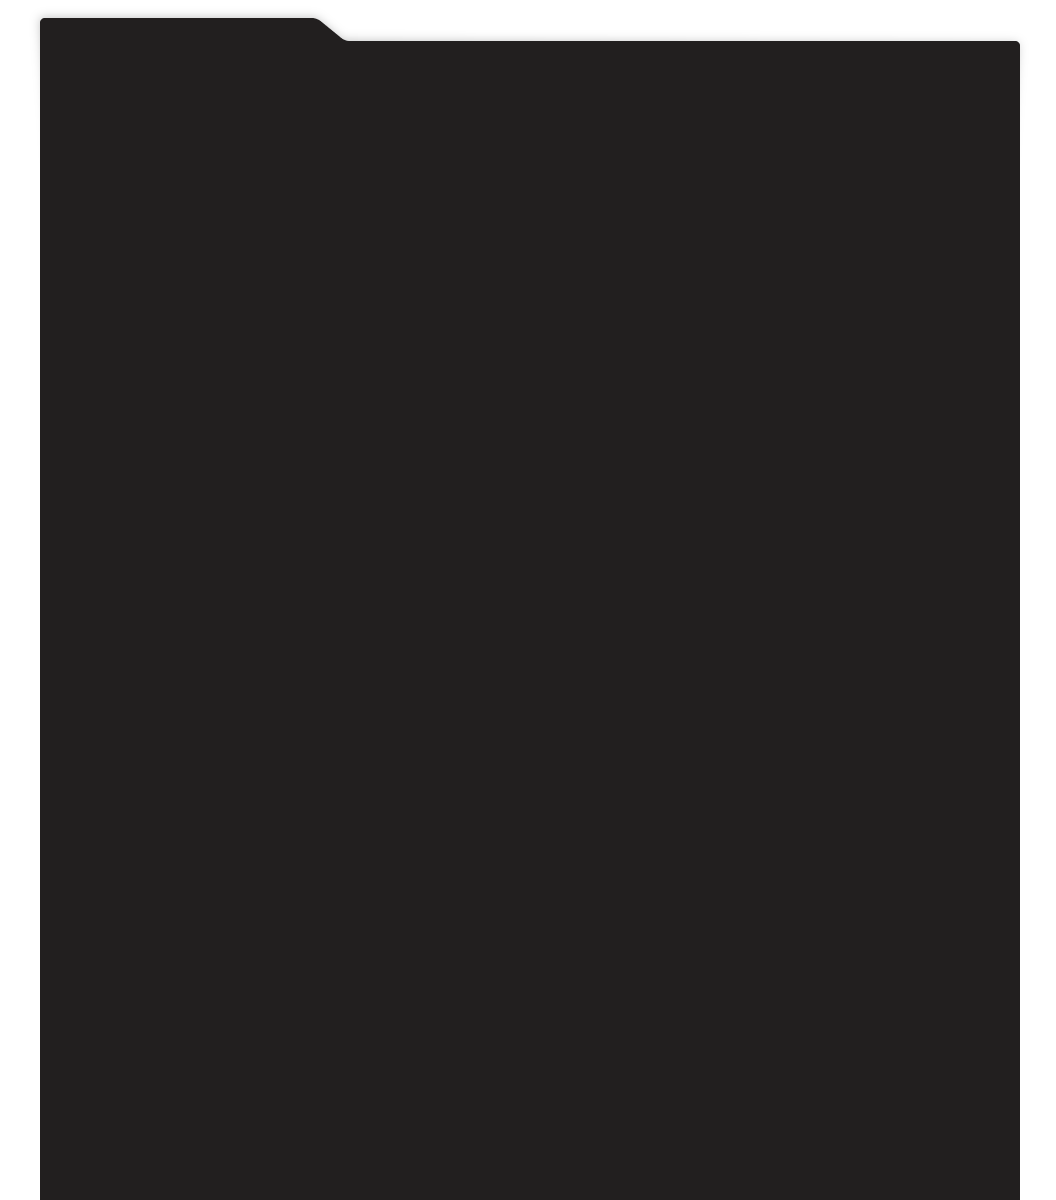
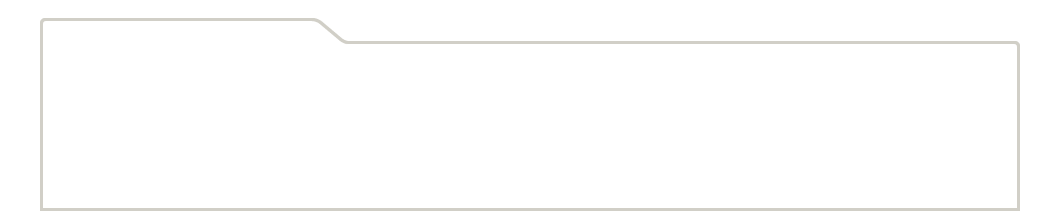
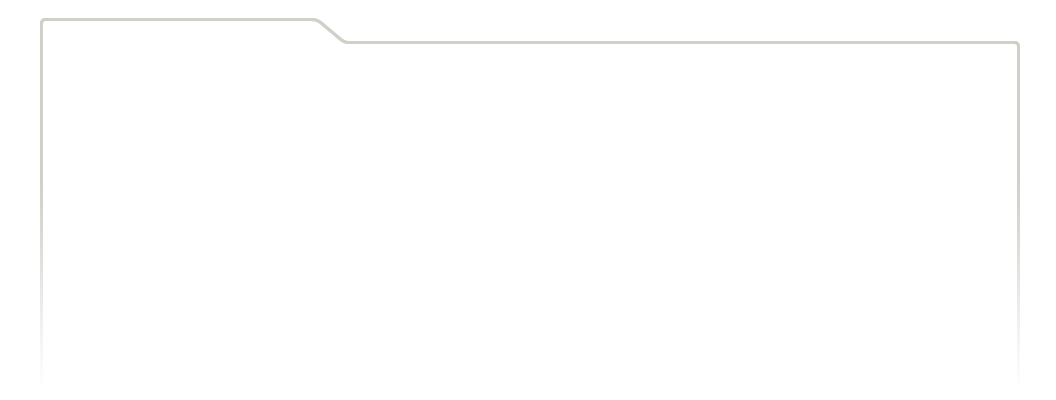
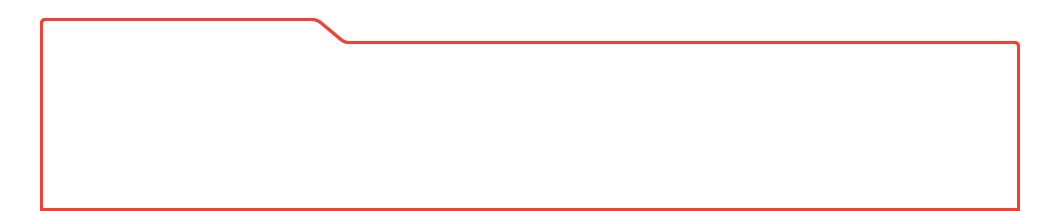
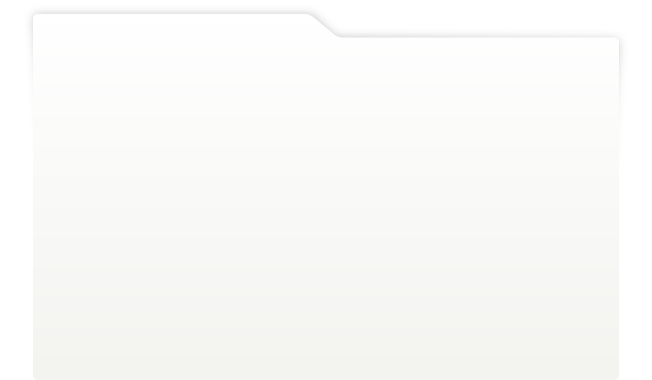
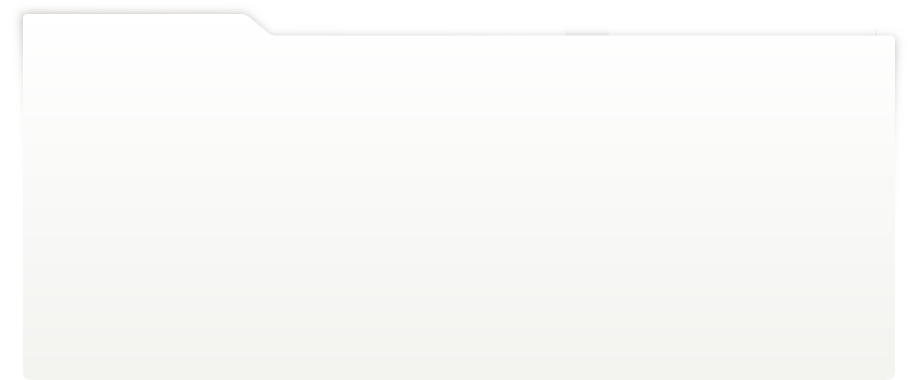
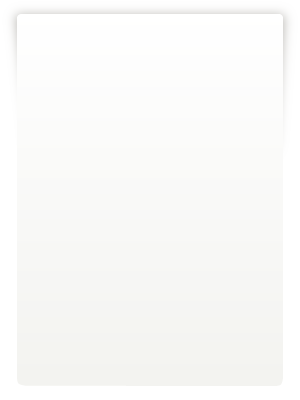
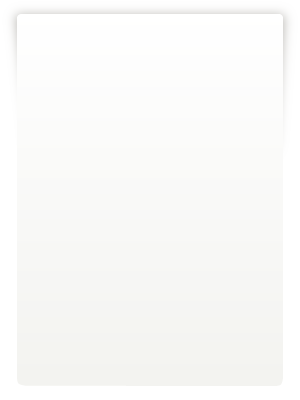
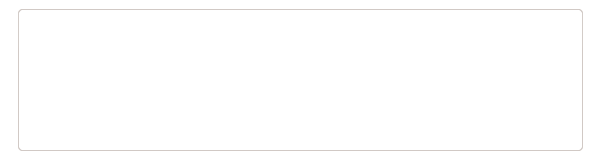
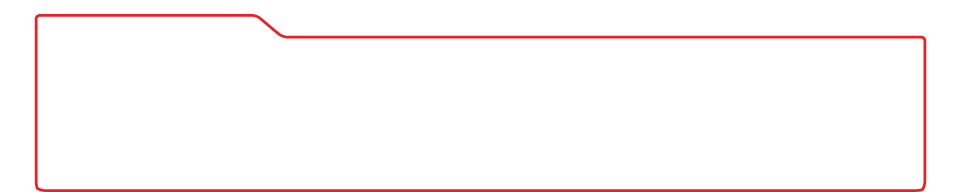
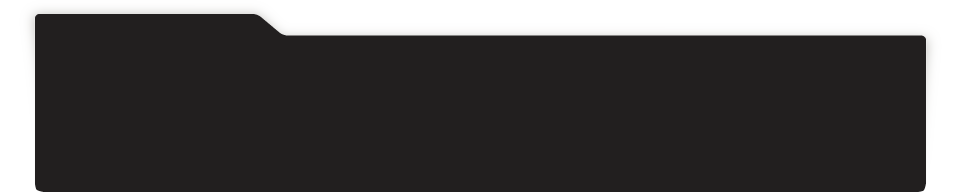
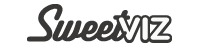
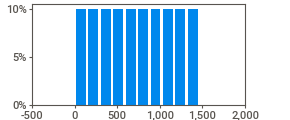
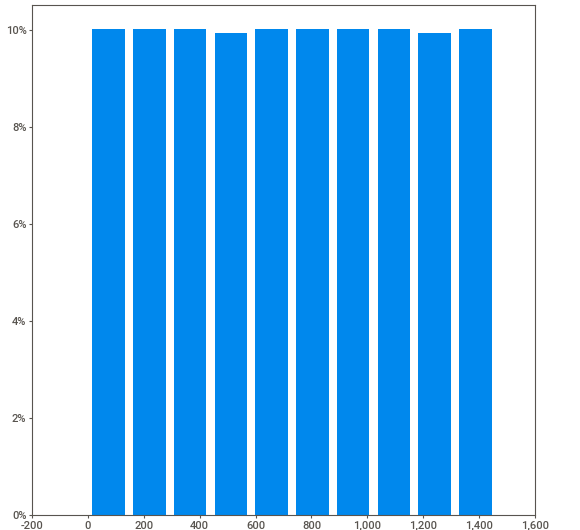
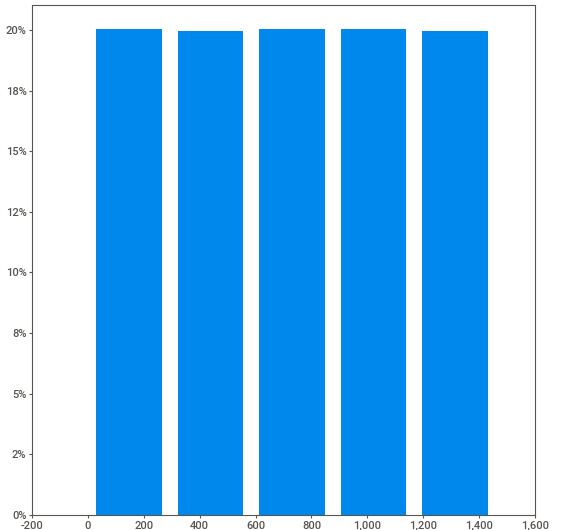
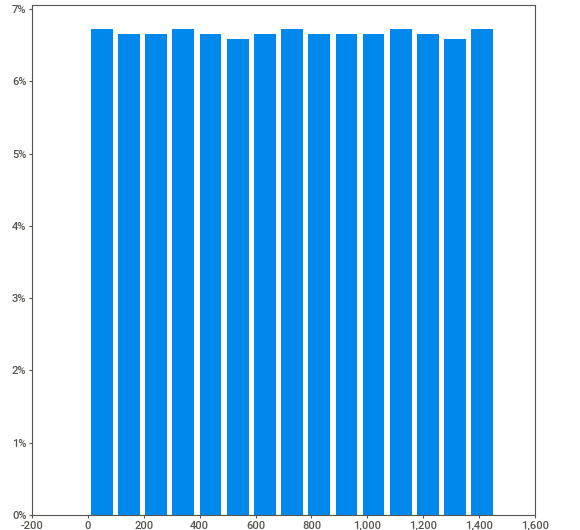
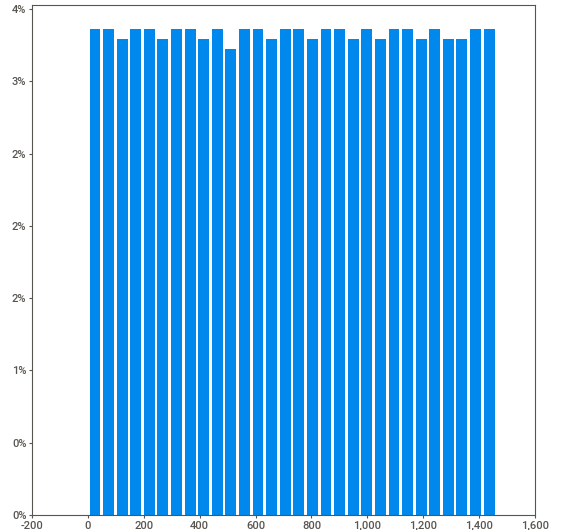
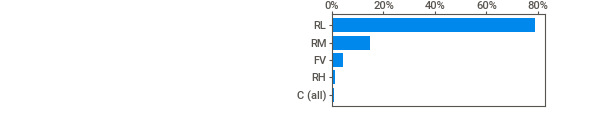
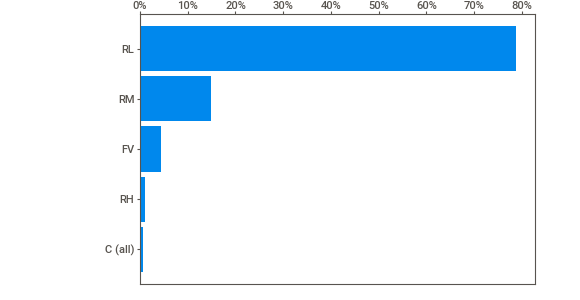
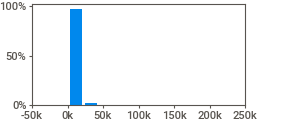
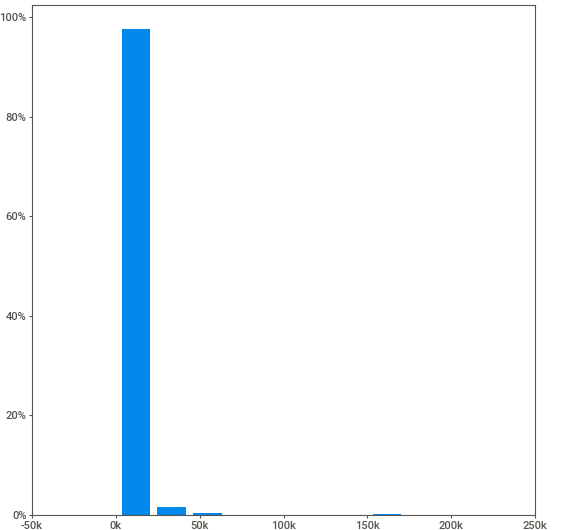
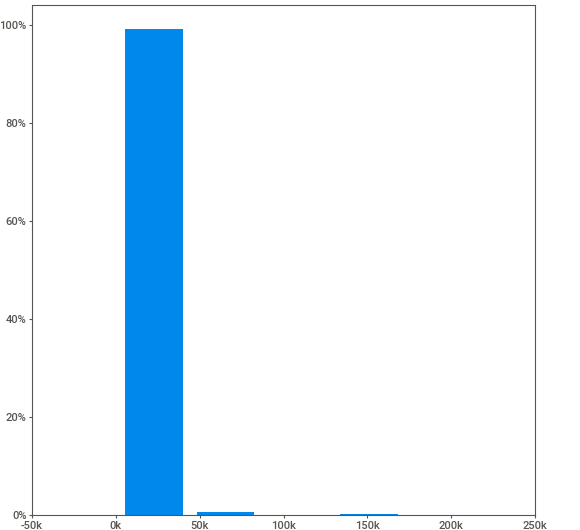
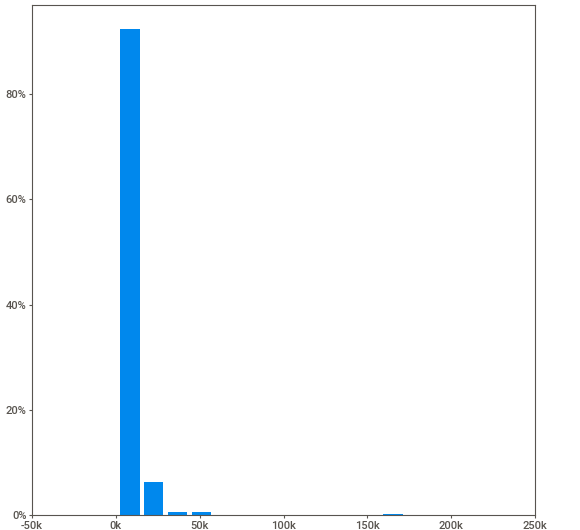
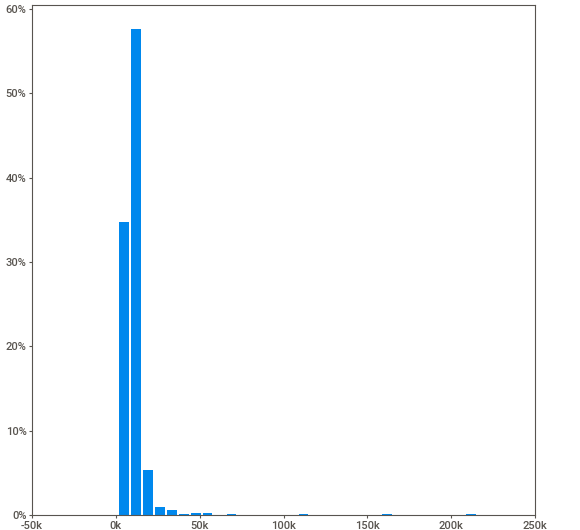
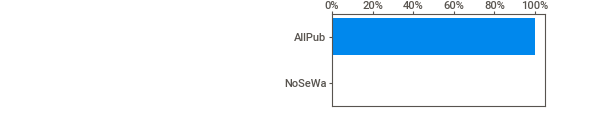
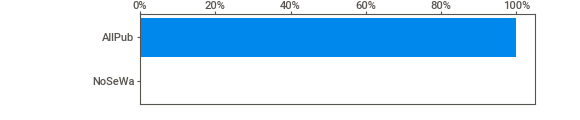
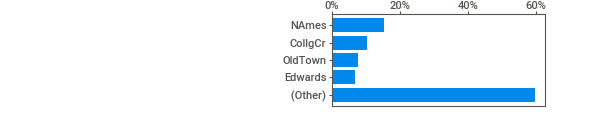
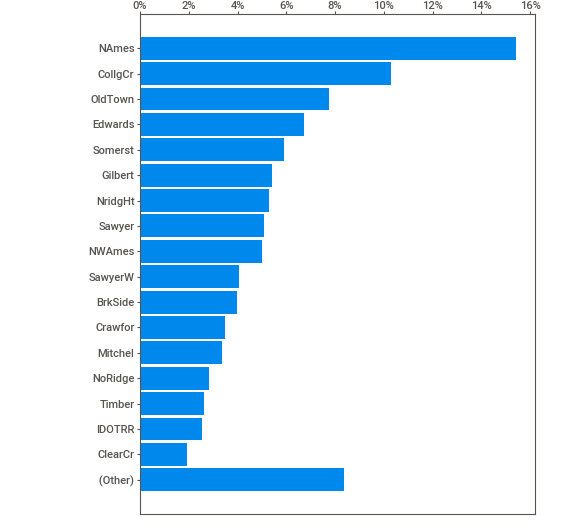
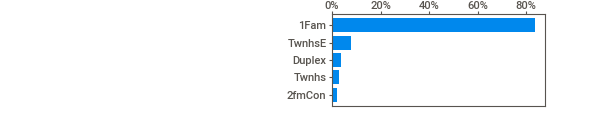
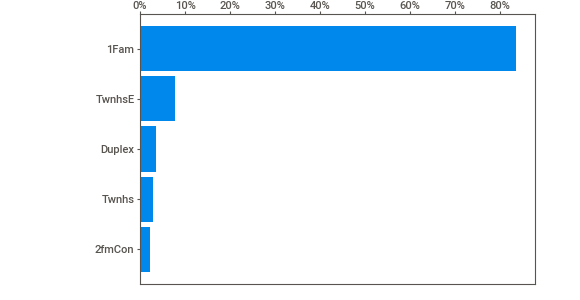
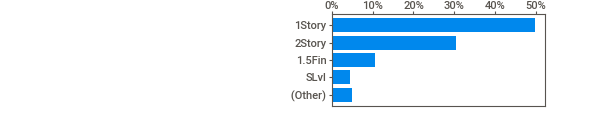
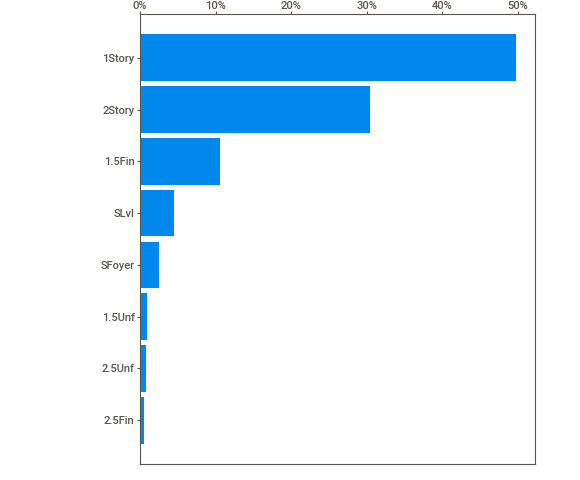
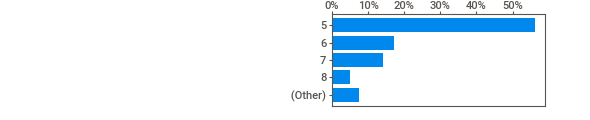
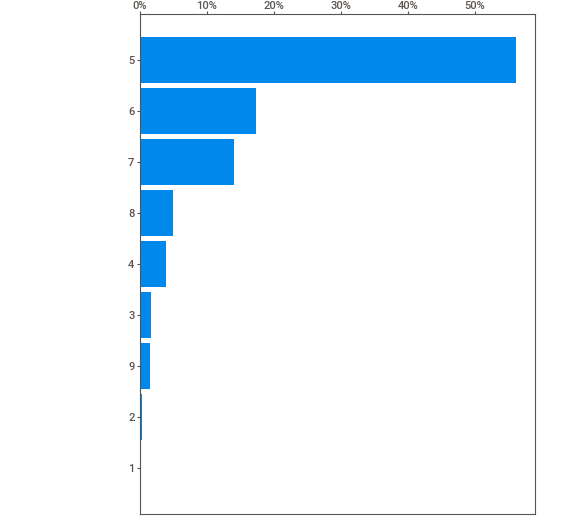
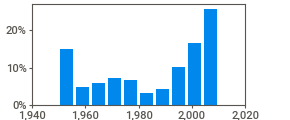
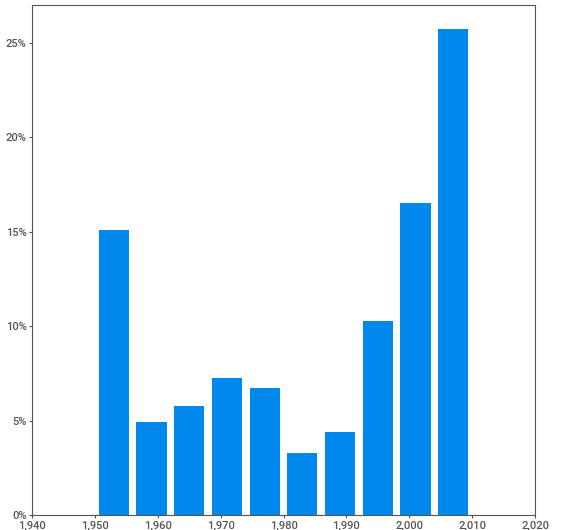
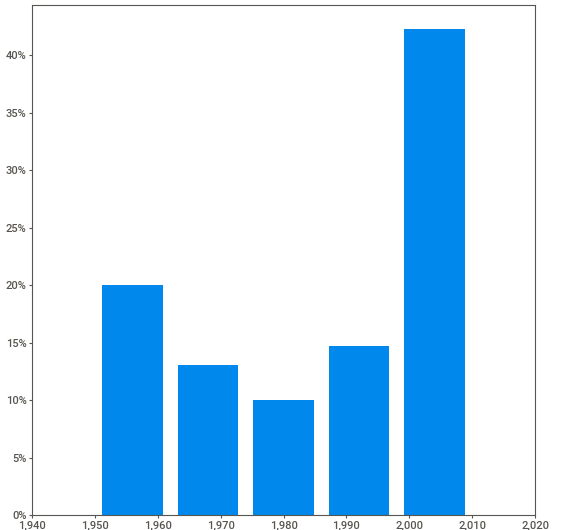
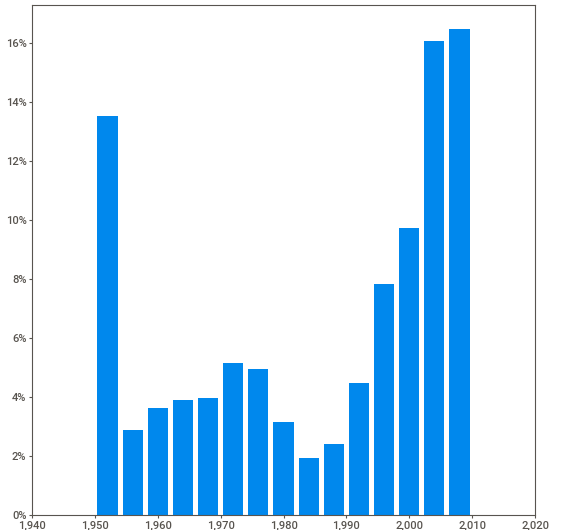
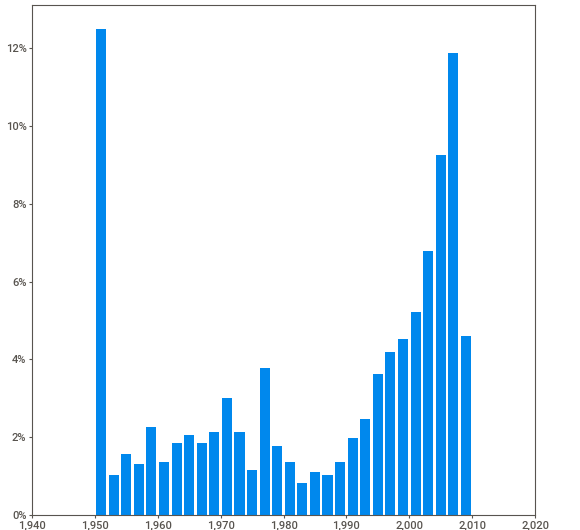
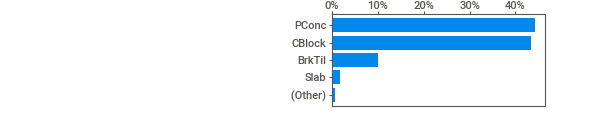
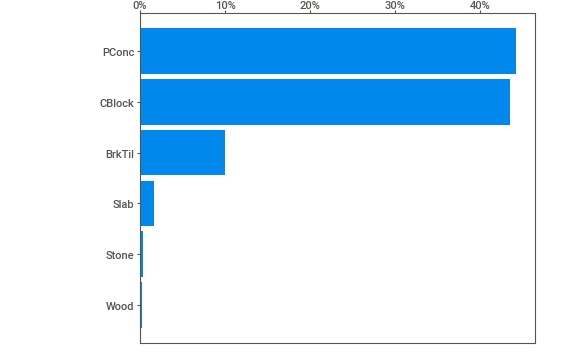
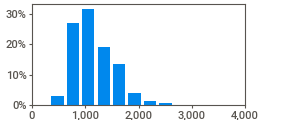
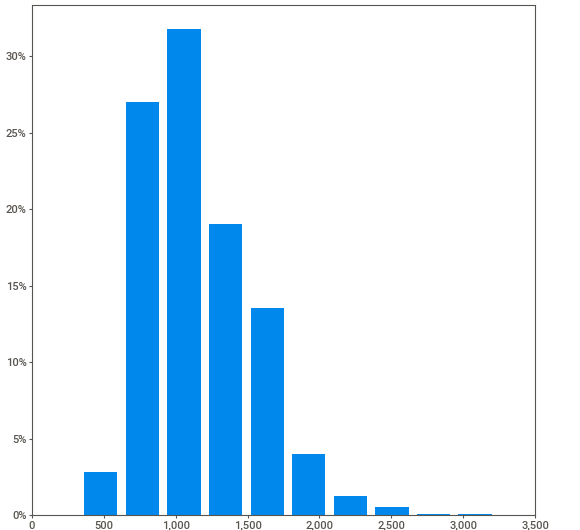
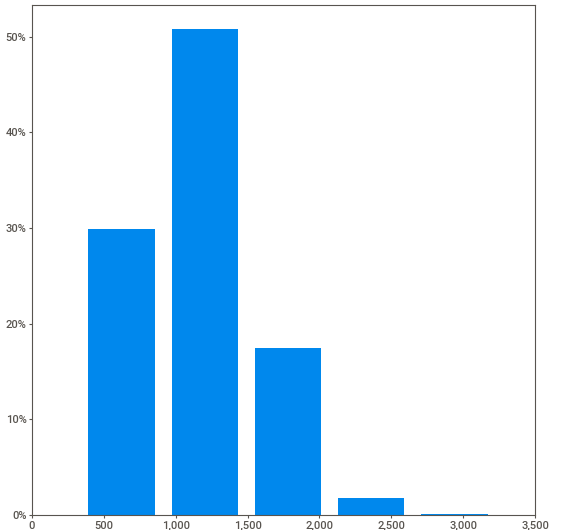
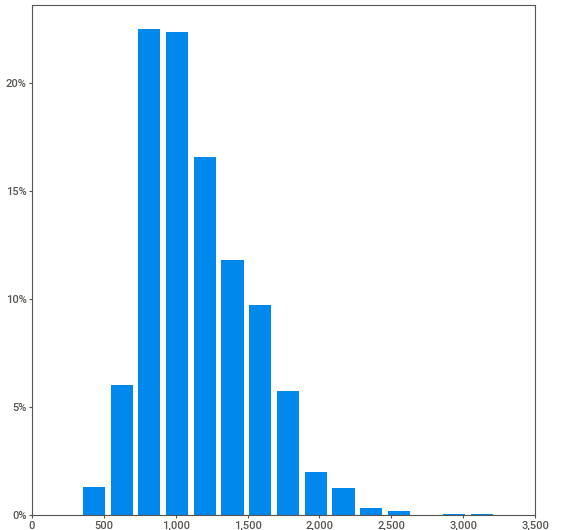
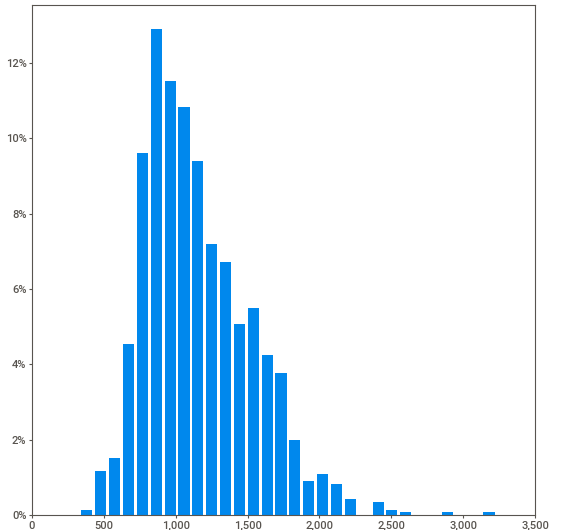
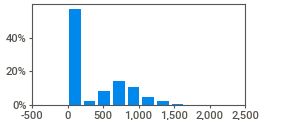
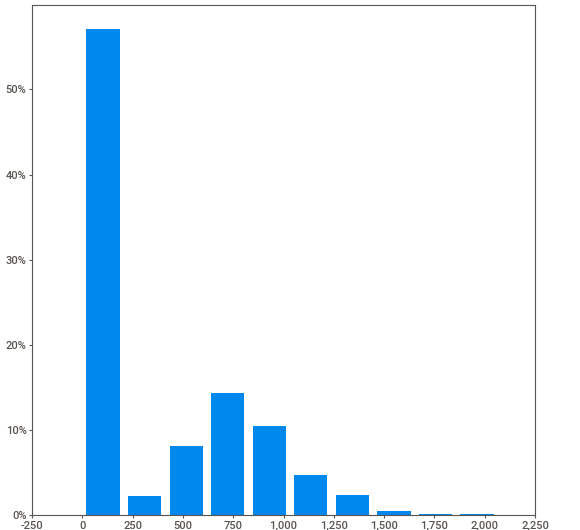
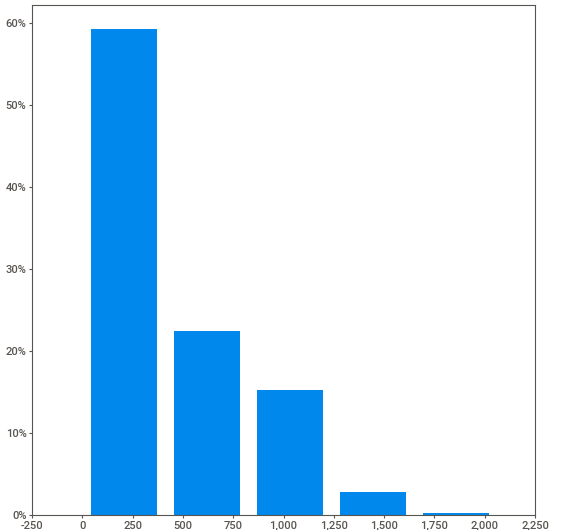
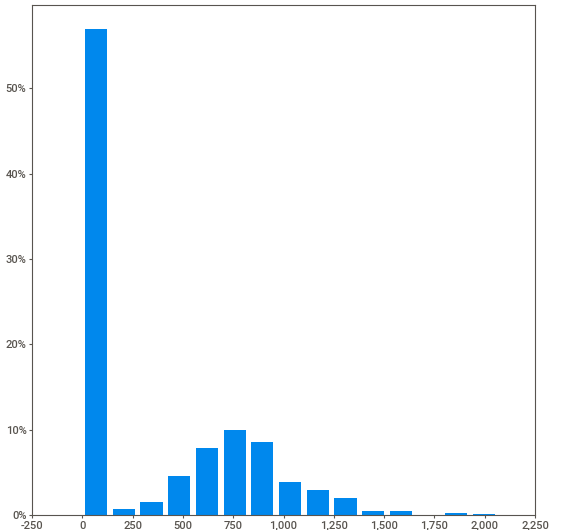
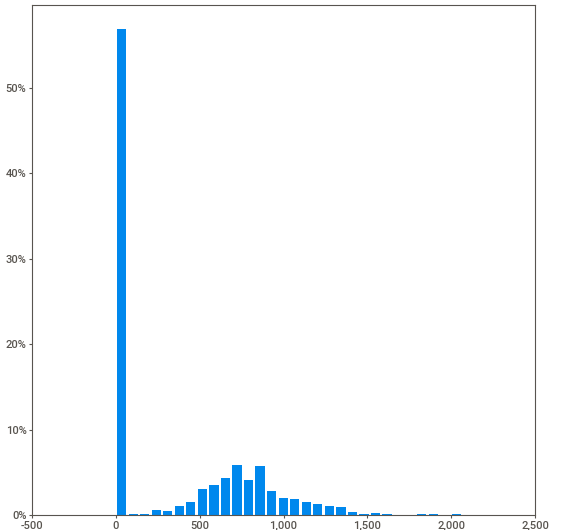
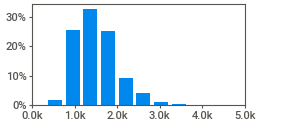
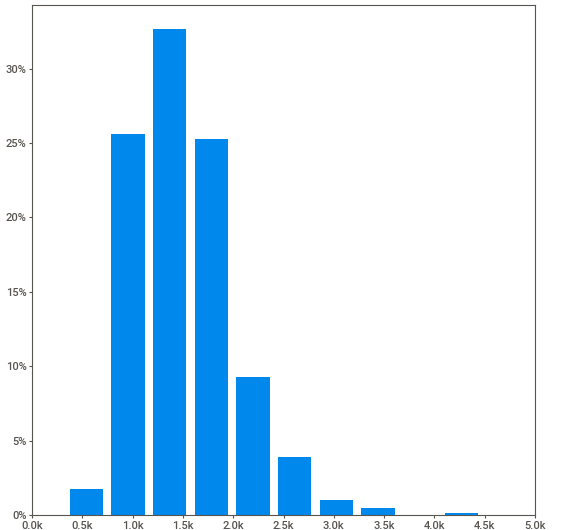
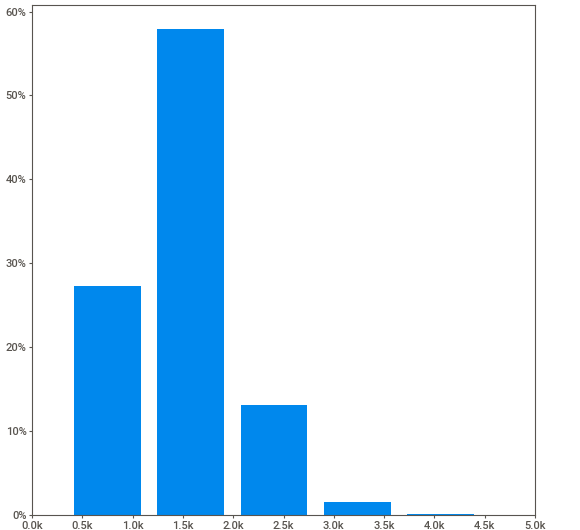
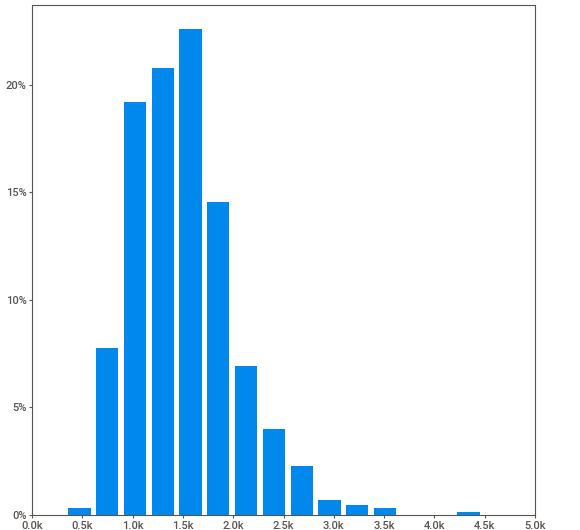
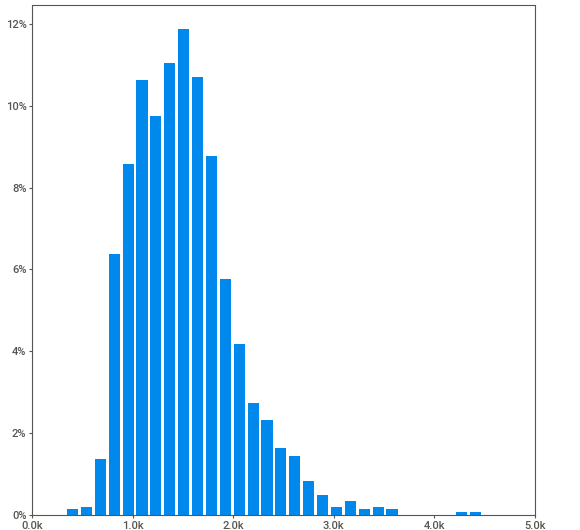
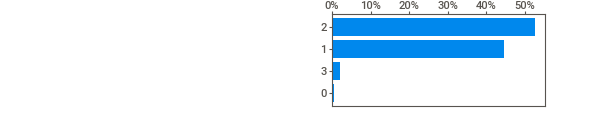
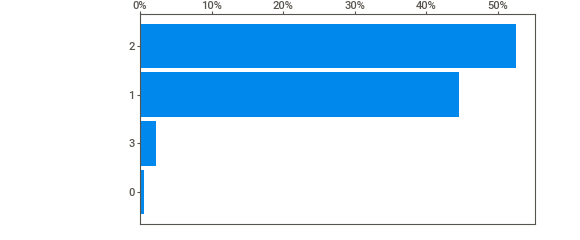
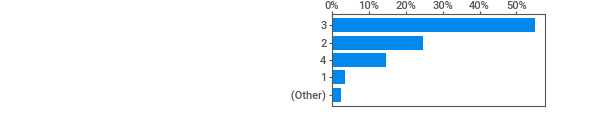
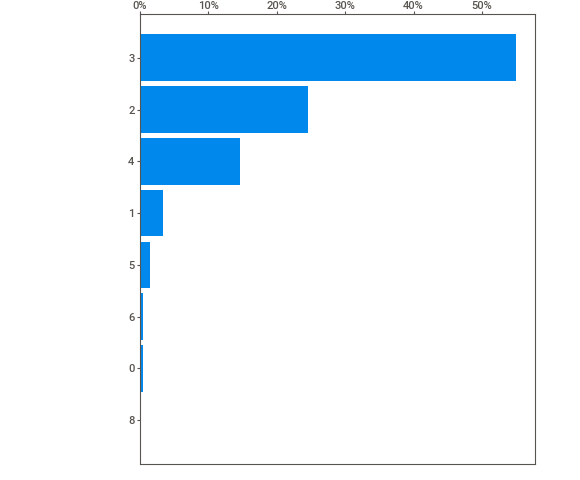
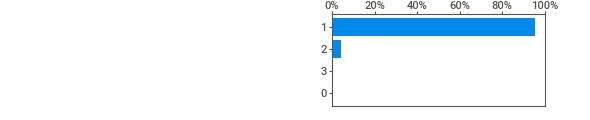
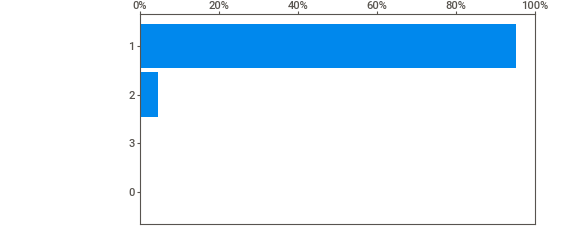
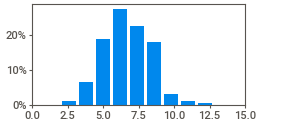
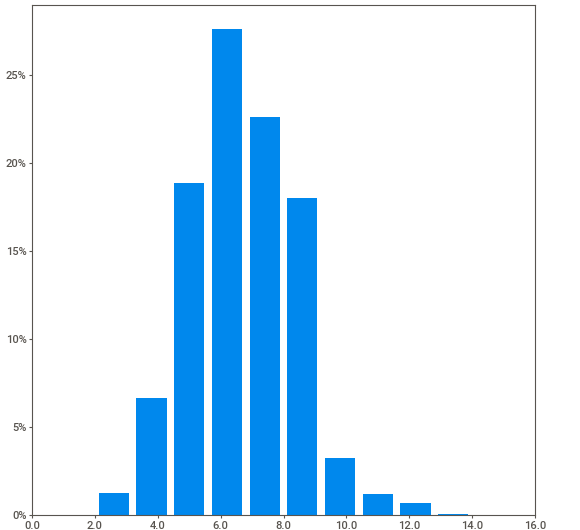
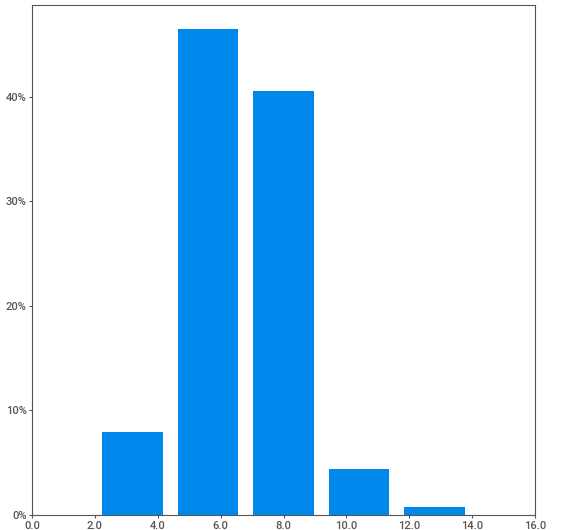
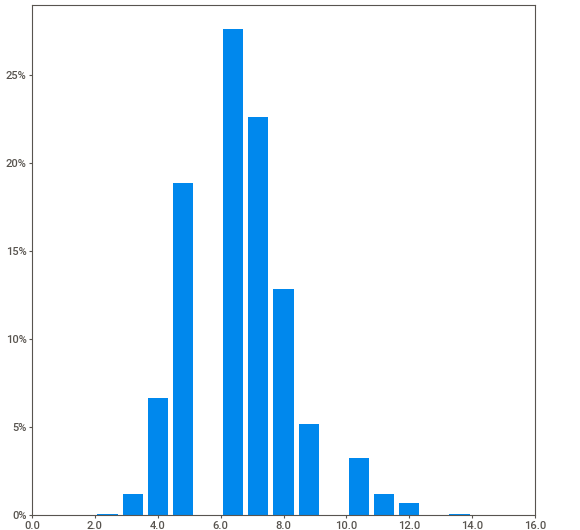
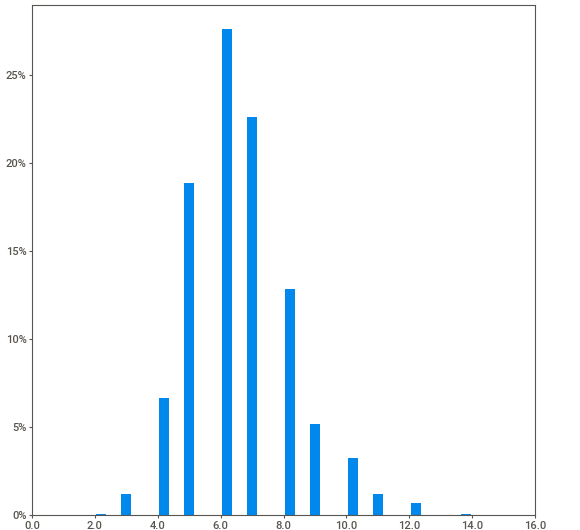
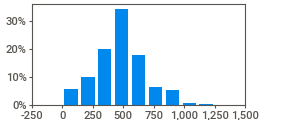
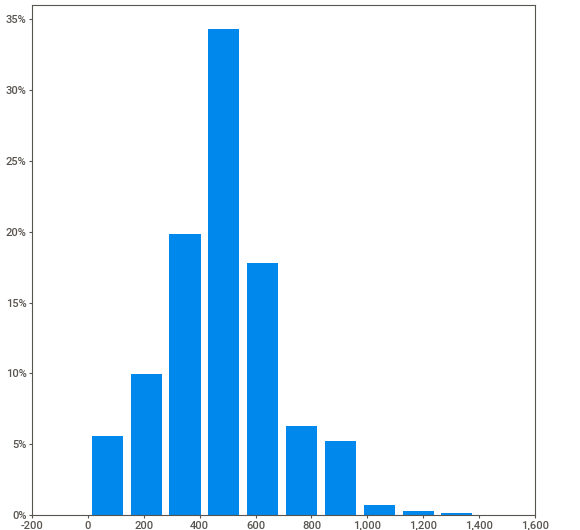
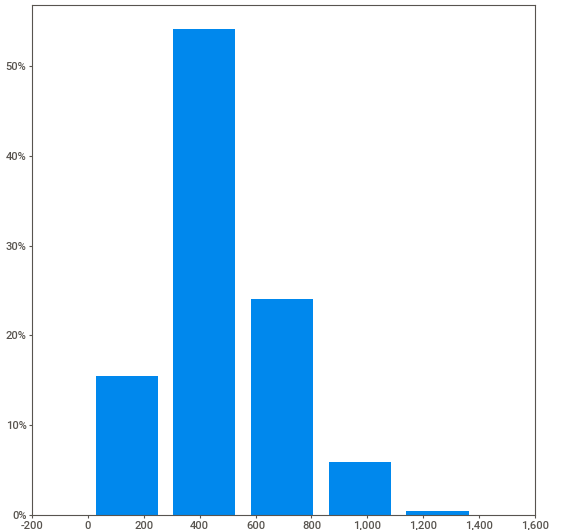
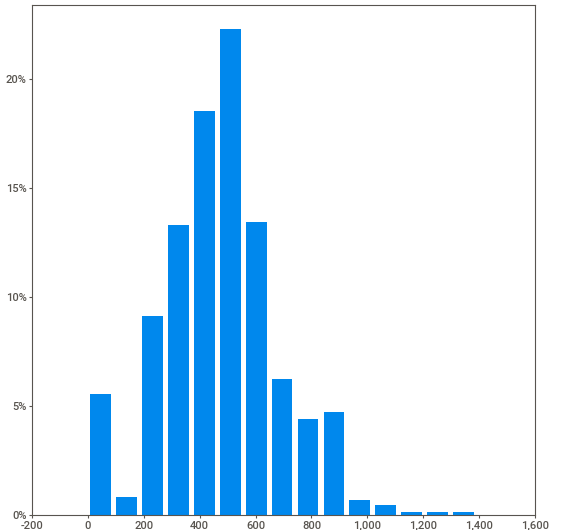
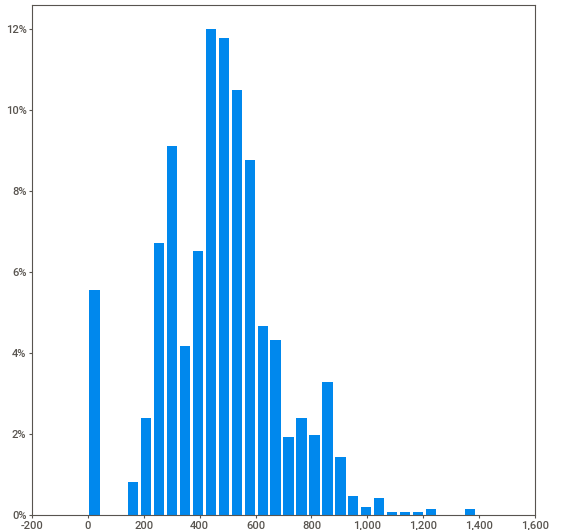
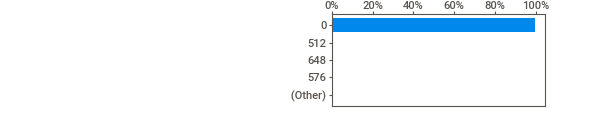
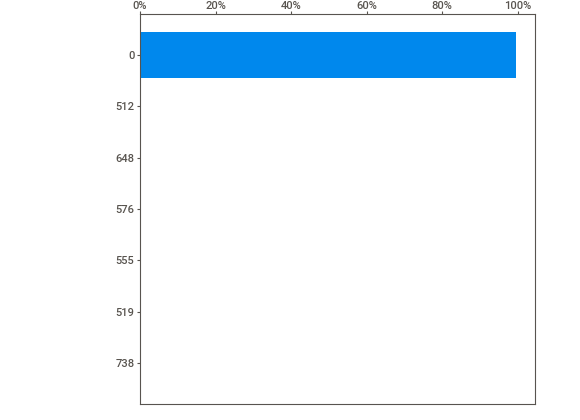
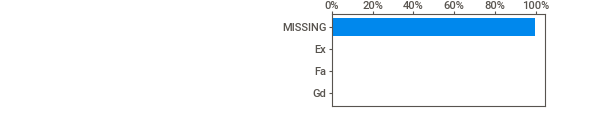
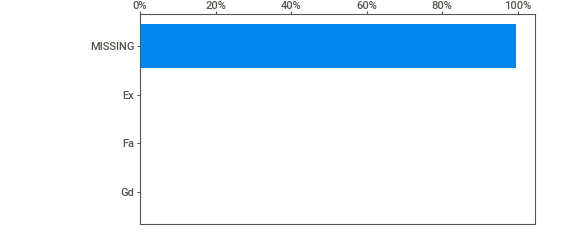
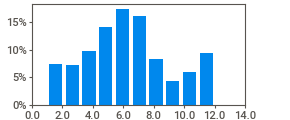
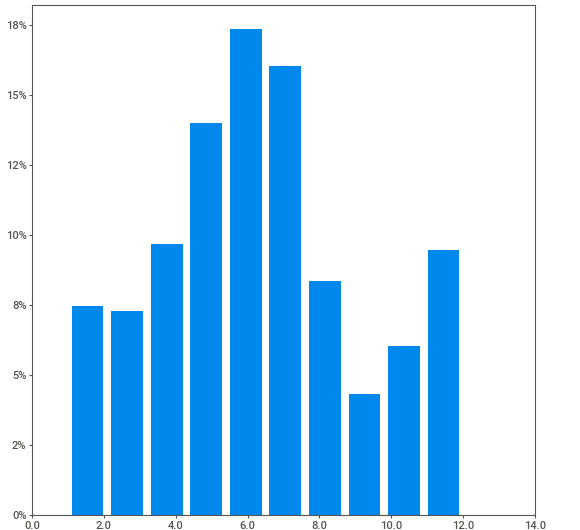
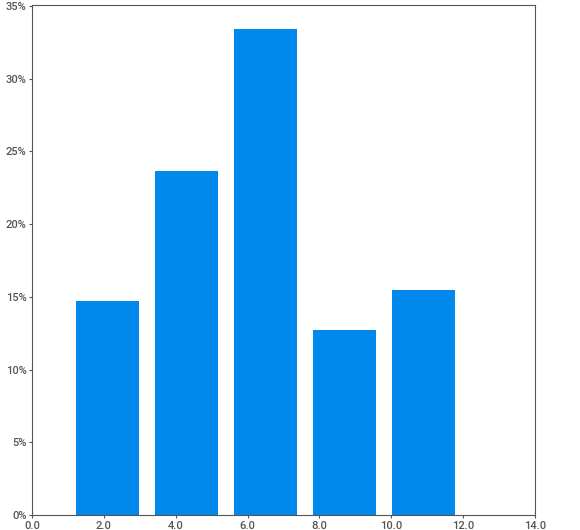
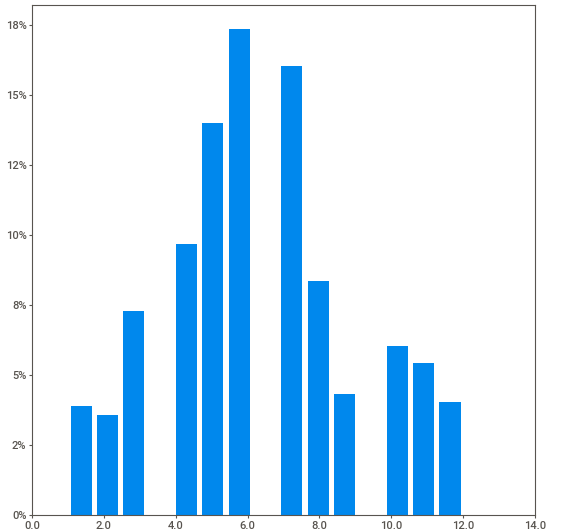
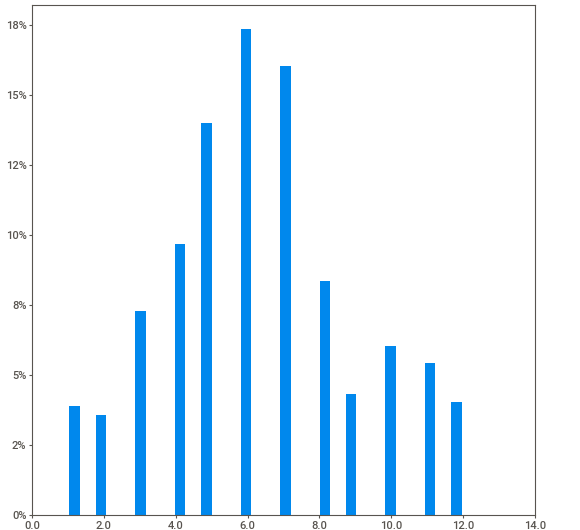
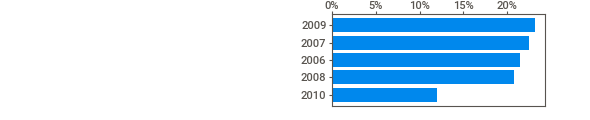
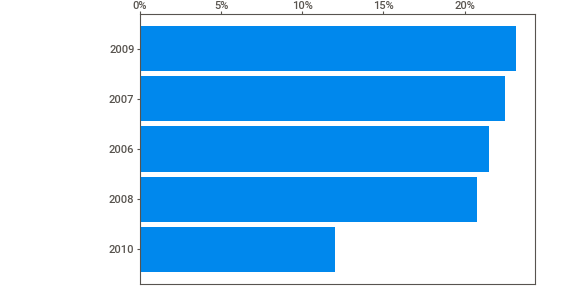
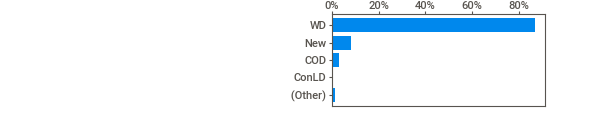
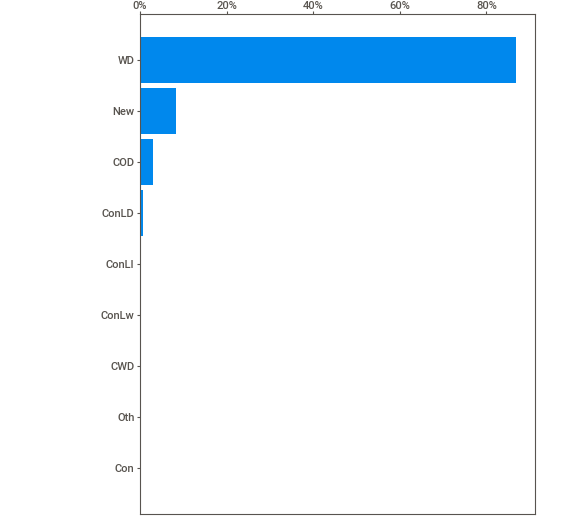
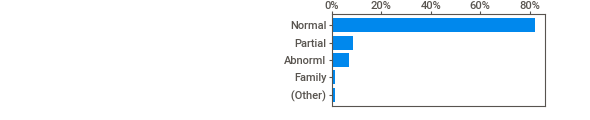
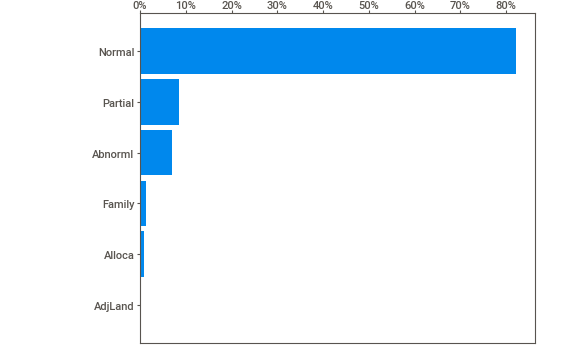
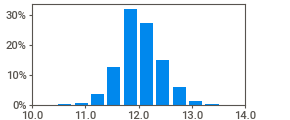
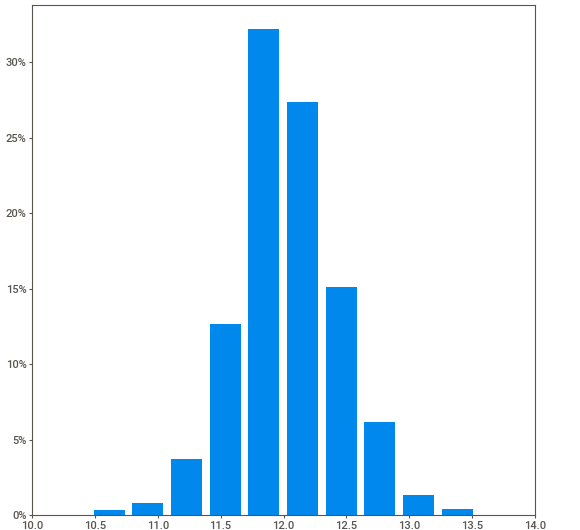
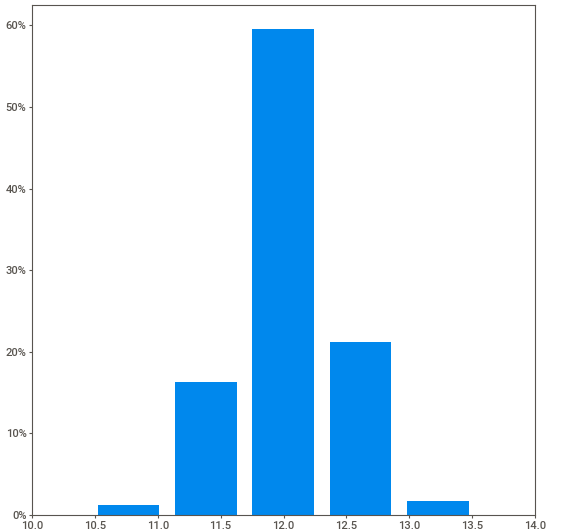
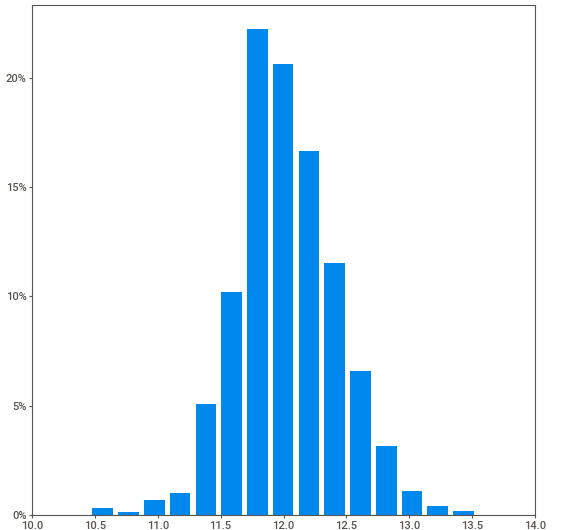
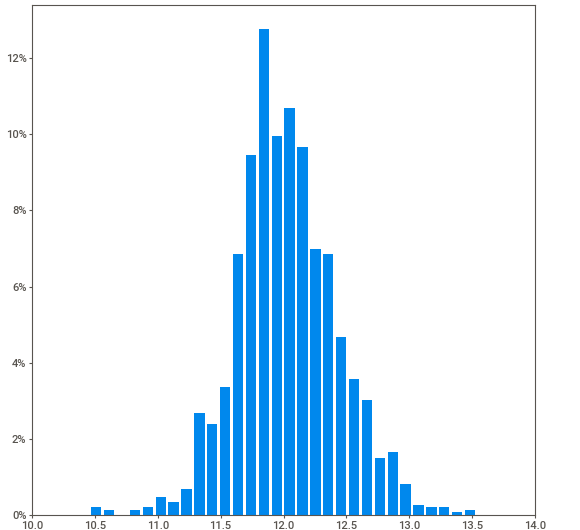
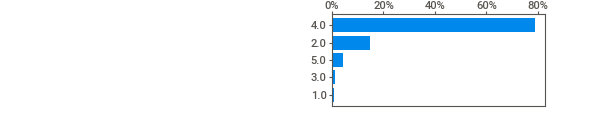
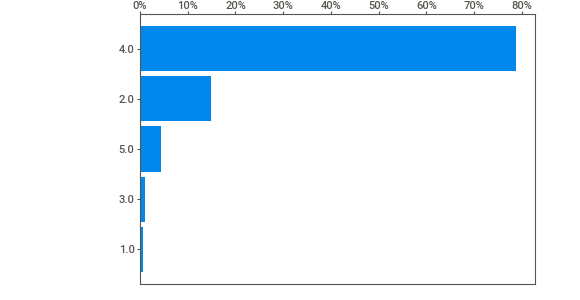
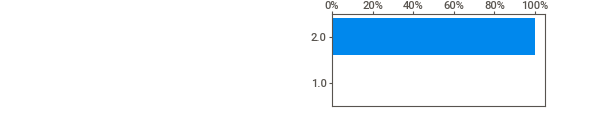
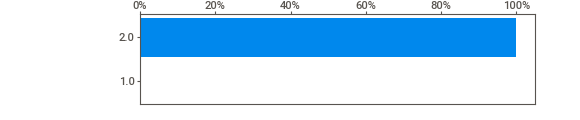
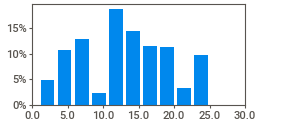
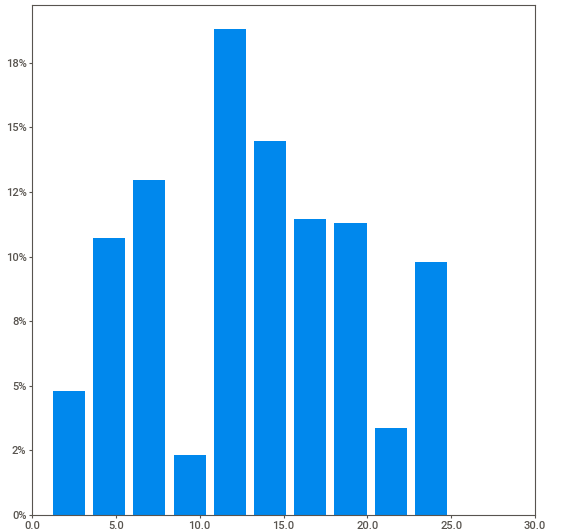
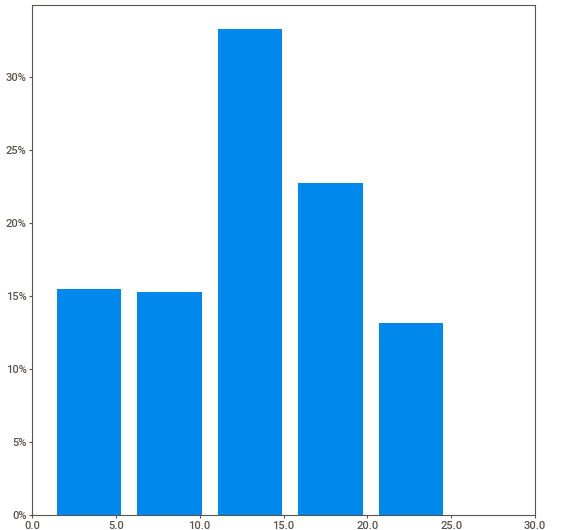
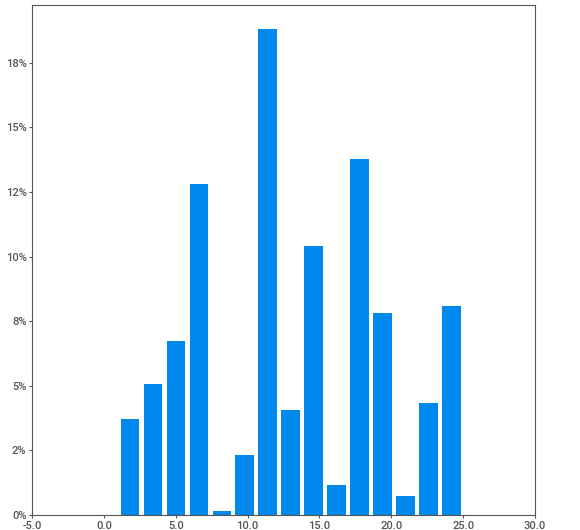
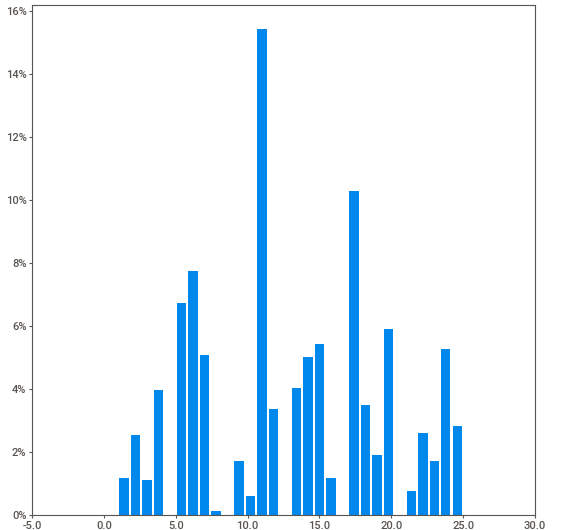
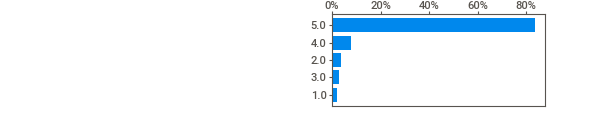
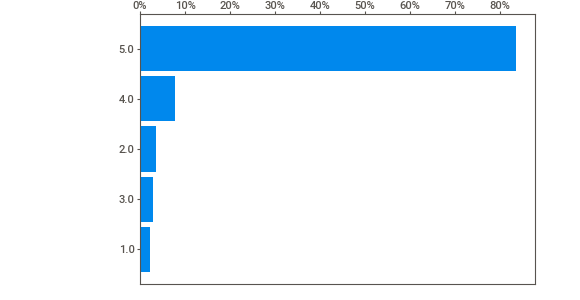
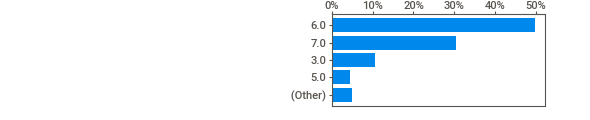
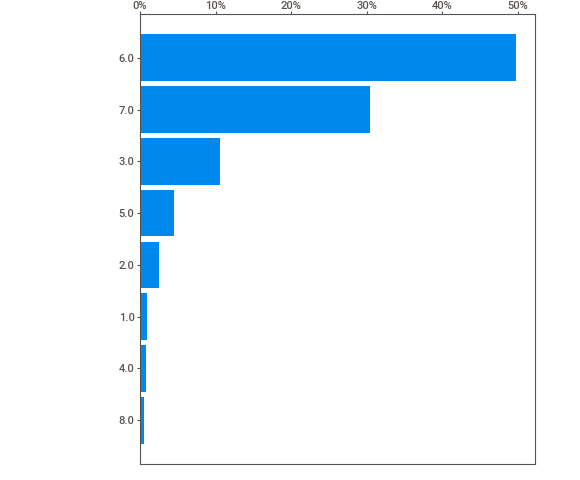
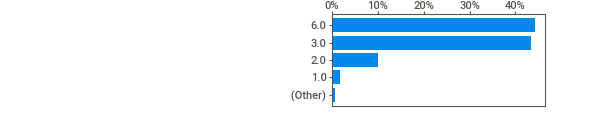
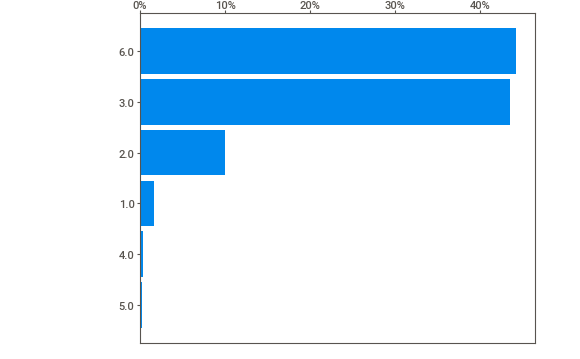
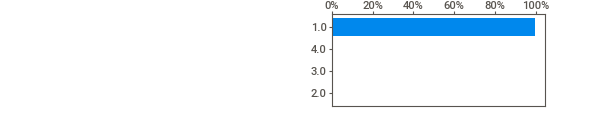
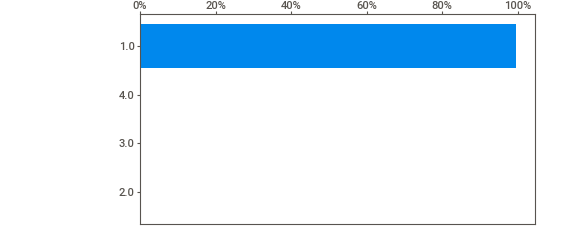
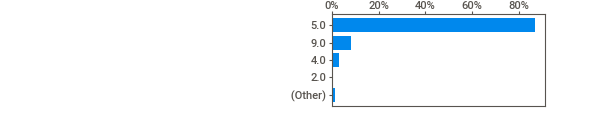
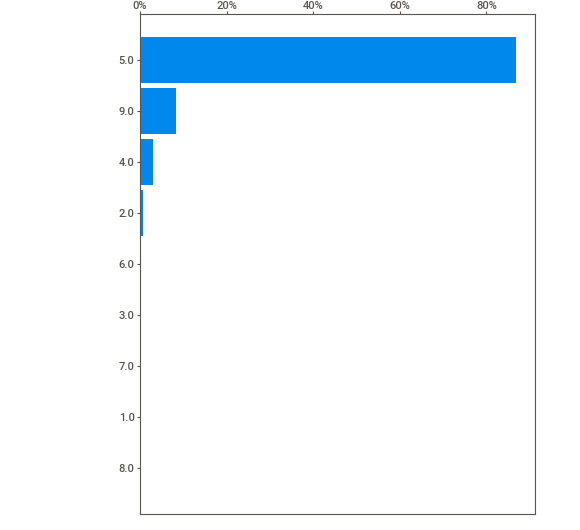
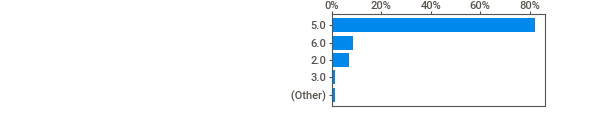
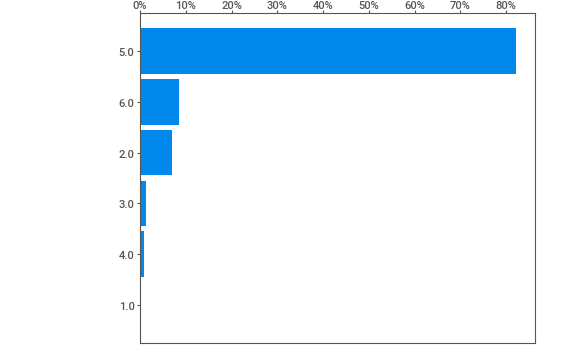
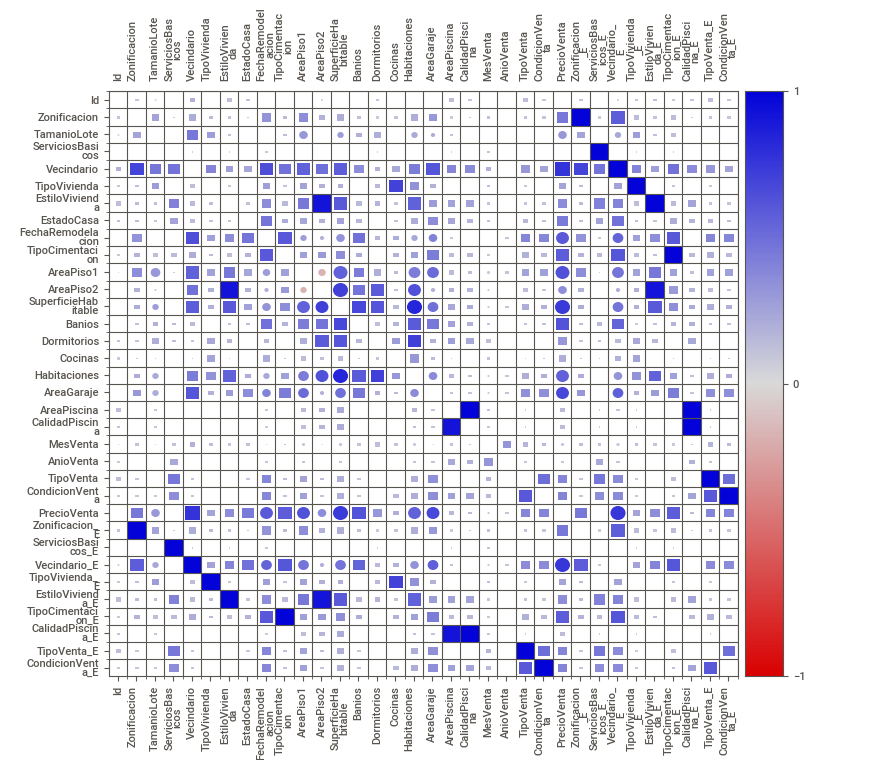
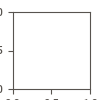

In [ ]:
import sweetviz as sv
sweet_report = sv.analyze(house_df)
sweet_report.show_notebook()

## Referencias:
* [Datasets](https://github.com/Juniorcandela/datasets/tree/main/House%20Prices)
* [Kaggle](https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python)
* [ChatGPT](https://chat.openai.com/)


#============Print("Muchas gracias") ================


In [ ]:
Image(url='https://raw.githubusercontent.com/Juniorcandela/datasets/main/LogoDGC.webp')